# ▷ 바로가기 이동

### 1. [LMS Node Review](#13-3.-데이터-탐색하기와-전처리)

### 2. [Exploration Project 13. 아이유팬이 좋아할 만한 다른 아티스트 찾기](#exploration-project-13)

※ 아이유 안나오니까, 아이유 찾아오신분 께서는 뒤로가기 눌러주시고요∼

바로가기 기능은 local에서 동작

<hr>

### 13-3. 데이터 탐색하기와 전처리

#### 데이터 준비

<hr>

그럼 데이터를 열어서 몇 가지 확인 및 전처리를 진행해 봅시다. 역시나 이번에도 우리의 친구는 Pandas입니다. 1.6Gb가 넘어가는 이렇게 큰 데이터를 처리하는데도 우리의 Pandas는 끄떡없다는 사실에 새삼 놀랍기도 합니다.

이전 스텝에서 확인한 바로는, 우리가 다룰 데이터는 그동안 흔히 보던 `csv` 파일이 아니고 `tsv` 파일입니다. 어떻게 생긴 파일일까요? 다음과 같이 열어 봅시다. 혹시나 해서 당부드립니다만, 굳이 vi를 사용해서 1.6Gb 짜리 데이터 전체를 통째로 메모리 상에 열어보지는 않도록 합시다.

~~~
    $ more ~/aiffel/recommendata_iu/data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv
~~~

아마 아래 그림과 같이 보일 것입니다. `tsv`는 Tab-Separated Values의 약자로서, Comma-Separated Values의 약자인 `csv` 파일과 거의 동일하나 구분자만 comma가 아니라 tab('\t') 문자를 활용한 것입니다. 이런 텍스트 파일은 Pandas의 read_csv 메서드로도 충분히 파싱해서 열어볼 수 있습니다.

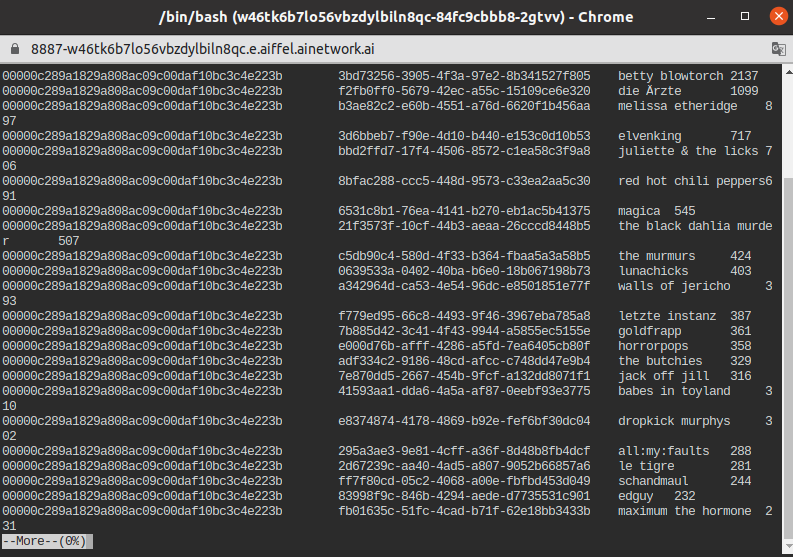

~~~
Q4. 위 그림을 보면 행마다 탭으로 구분된 4개의 컬럼이 포함된 것 같습니다. 데이터셋 홈페이지(http://ocelma.net/MusicRecommendationDataset/lastfm-360K.html) 에서 확인해 볼 때, 4개의 컬럼의 의미는 각각 무엇일까요?

항목정의가 ( user-mboxsha1 \t musicbrainz-artist-id \t artist-name \t plays ) 라고 되어 있는 것으로 보아, 4개의 항목은 각각 User ID, Artist MBID, Artist Name, Play횟수 로 보입니다.
~~~

그럼 Pandas를 활용해 이 데이터를 열어 보겠습니다. 위 데이터에는 컬럼명이 포함되어 있지 않으므로, 아래와 같이 col_names에 적절히 컬럼명을 지정해 주도록 하겠습니다.

In [1]:
import pandas as pd
import os

fname = os.getenv('HOME') + '/aiffel/recommendata_iu/data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv'
col_names = ['user_id', 'artist_MBID', 'artist', 'play']   # 임의로 지정한 컬럼명
data = pd.read_csv(fname, sep='\t', names= col_names)      # sep='\t'로 주어야 tsv를 열 수 있습니다.  
data.head(10)

,user_id,artist_MBID,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,8bfac288-ccc5-448d-9573-c33ea2aa5c30,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,6531c8b1-76ea-4141-b270-eb1ac5b41375,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,21f3573f-10cf-44b3-aeaa-26cccd8448b5,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,c5db90c4-580d-4f33-b364-fbaa5a3a58b5,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,0639533a-0402-40ba-b6e0-18b067198b73,lunachicks,403


`artist_MBID` 항목은 우리의 관심사가 아닙니다. 사용하는 컬럼만 남기고 제거하도록 하겠습니다.

In [2]:
# 사용하는 컬럼만 남겨줍니다.
using_cols = ['user_id', 'artist', 'play']
data = data[using_cols]
data.head(10)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


In [3]:
# 검색을 쉽게 하기 위해 아티스트 문자열을 소문자로 바꿔줍시다.
data['artist'] = data['artist'].str.lower()
data.head(10)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


첫 번째 유저가 어떤 아티스트의 노래를 듣는지 확인해 봅시다.

In [4]:
condition = (data['user_id']== data.loc[0, 'user_id'])
data.loc[condition]

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


처음 들어보는 아티스트가 많습니다. 추천 시스템에서는 적용하는 분야에 대한 지식이 특히 더 필요한데, 모르면 검증을 못 하기 때문입니다.



#### 데이터 탐색

<hr>

추천 모델을 만들기 전에 데이터의 기본적인 정보를 보고 갑시다. 아래 항목들을 확인해 보고 싶습니다.

- 유저 수, 아티스트 수, 인기 많은 아티스트

- 유저들이 몇 명의 아티스트를 듣고 있는지에 대한 통계

- 유저 play 횟수 중앙값에 대한 통계

(참고) `pandas.DataFrame.nunique()` 은 특정 컬럼에 포함된 유니크한 데이터의 개수를 알아보는데 유용합니다.



In [5]:
# 유저 수
data['user_id'].nunique()

358868

In [6]:
# 아티스트 수
data['artist'].nunique()

291346

In [7]:
# 인기 많은 아티스트
artist_count = data.groupby('artist')['user_id'].count()
artist_count.sort_values(ascending=False).head(30)

artist
radiohead                77254
the beatles              76245
coldplay                 66658
red hot chili peppers    48924
muse                     46954
metallica                45233
pink floyd               44443
the killers              41229
linkin park              39773
nirvana                  39479
system of a down         37267
queen                    34174
u2                       33206
daft punk                33001
the cure                 32624
led zeppelin             32295
placebo                  32072
depeche mode             31916
david bowie              31862
bob dylan                31799
death cab for cutie      31482
arctic monkeys           30348
foo fighters             30144
air                      29795
the rolling stones       29754
nine inch nails          28946
sigur rós                28901
green day                28732
massive attack           28691
moby                     28232
Name: user_id, dtype: int64

In [8]:
# 유저별 몇 명의 아티스트를 듣고 있는지에 대한 통계
user_count = data.groupby('user_id')['artist'].count()
user_count.describe()

count    358868.000000
mean         48.863234
std           8.524272
min           1.000000
25%          46.000000
50%          49.000000
75%          51.000000
max         166.000000
Name: artist, dtype: float64

In [9]:
# 유저별 play횟수 중앙값에 대한 통계
user_median = data.groupby('user_id')['play'].median()
user_median.describe()

count    358868.000000
mean        142.187676
std         213.089902
min           1.000000
25%          32.000000
50%          83.000000
75%         180.000000
max       50142.000000
Name: play, dtype: float64

#### 모델 검증을 위한 사용자 초기 정보 세팅

<hr>

우리는 본인의 음악 취향과 가장 유사한 아티스트를 추천받고 싶습니다. 유튜브 뮤직 등 추천 시스템들은 이를 위해서 처음 가입하는 사용자의 취향
과 유사한 아티스트 정보를 5개 이상 입력받는 과정을 거치게 하는 경우가 많습니다.
우리도 동일한 과정이 필요합니다. 우리가 만든 추천 시스템의 추후 검증 과정을 위해, '나는 A를 좋아한다.'라는 정보를 위 데이터셋에 5개 이상 추가해 주어야 합니다. 저는 아래와 같이 제가 좋아하는 유명한 아티스트들을 기존의 데이터에 추가해서 넣겠습니다.

In [10]:
# 본인이 좋아하시는 아티스트 데이터로 바꿔서 추가하셔도 됩니다! 단, 이름은 꼭 데이터셋에 있는 것과 동일하게 맞춰주세요. 
my_favorite = ['black eyed peas' , 'maroon5' ,'jason mraz' ,'coldplay' ,'beyoncé']

# 'zimin'이라는 user_id가 위 아티스트의 노래를 30회씩 들었다고 가정하겠습니다.
my_playlist = pd.DataFrame({'user_id': ['zimin']*5, 'artist': my_favorite, 'play':[30]*5})

if not data.isin({'user_id':['zimin']})['user_id'].any():  # user_id에 'zimin'이라는 데이터가 없다면
    data = data.append(my_playlist)                           # 위에 임의로 만든 my_favorite 데이터를 추가해 줍니다. 

data.tail(10)       # 잘 추가되었는지 확인해 봅시다.

,user_id,artist,play
17535650,"sep 20, 2008",turbostaat,12
17535651,"sep 20, 2008",cuba missouri,11
17535652,"sep 20, 2008",little man tate,11
17535653,"sep 20, 2008",sigur rós,10
17535654,"sep 20, 2008",the smiths,10
0,zimin,black eyed peas,30
1,zimin,maroon5,30
2,zimin,jason mraz,30
3,zimin,coldplay,30
4,zimin,beyoncé,30


#### 모델에 활용하기 위한 전처리 (실습)

<hr>

사람이 태어나면 주민등록번호가, 학교에 가면 출석번호가 있듯이 데이터의 관리를 쉽게 하기 위해 번호를 붙여주고 싶습니다. 우리가 다루는 데이터에서는 user와 artist 각각에 번호를 붙이고 싶습니다. 보통 이런 작업을 indexing이라고 합니다. 추천 시스템, 자연어 처리에서 자주 하는 작업들이라 직접 해보시면 좋겠습니다.



(참고) `pandas.DataFrame.unique()`은 특정 컬럼에 포함된 유니크한 데이터만 모아 줍니다. indexing 작업을 위해 매우 유용합니다.

In [11]:
# 고유한 유저, 아티스트를 찾아내는 코드
user_unique = data['user_id'].unique()
artist_unique = data['artist'].unique()

# 유저, 아티스트 indexing 하는 코드 idx는 index의 약자입니다.
user_to_idx = {v:k for k,v in enumerate(user_unique)}
artist_to_idx = {v:k for k,v in enumerate(artist_unique)}

In [12]:
# 인덱싱이 잘 되었는지 확인해 봅니다. 
print(user_to_idx['zimin'])    # 358869명의 유저 중 마지막으로 추가된 유저이니 358868이 나와야 합니다. 
print(artist_to_idx['black eyed peas'])

358868
376


In [13]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드
# dictionary 자료형의 get 함수는 https://wikidocs.net/16 을 참고하세요.

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해 봅시다. 
# 혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될 테니 dropna()로 제거합니다. 
temp_user_data = data['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(data):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    data['user_id'] = temp_user_data   # data['user_id']을 인덱싱된 Series로 교체해 줍니다. 
else:
    print('user_id column indexing Fail!!')

# artist_to_idx을 통해 artist 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
temp_artist_data = data['artist'].map(artist_to_idx.get).dropna()
if len(temp_artist_data) == len(data):
    print('artist column indexing OK!!')
    data['artist'] = temp_artist_data
else:
    print('artist column indexing Fail!!')

data

user_id column indexing OK!!
artist column indexing OK!!


,user_id,artist,play
0,0,0,2137
1,0,1,1099
2,0,2,897
3,0,3,717
4,0,4,706
...,...,...,...
0,358868,376,30
1,358868,270115,30
2,358868,3746,30
3,358868,62,30


`data` 의 `user_id` 와 `artist` 컬럼 내 값들이 모두 정수 인덱스 값으로 잘 변경되었나요? 이것으로 훈련을 위한 전처리가 완료되었습니다!!

### 13-4. 사용자의 명시적/암묵적 평가

우리의 추천 시스템은 사용자들이 아이템을 얼마나 선호하는지를 모델링 하기를 원합니다. 그러자면 사용자의 아이템 선호도를 말해 주는 유저 행동 데이터셋이 필요합니다. 만약 우리 데이터가 좋아요나 별점처럼 선호도를 명시적(explicit)으로 나타내는 것이라면 참 좋겠지만, 지금 우리가 가지고 있는 데이터는 사용자가 아티스트의 곡을 몇 번 플레이했나 하는 것뿐입니다. 이렇게 서비스를 사용하면서 자연스럽게 발생하는 암묵적(implicit)인 피드백도 사용자의 아이템에 대한 평가를 알 수 있는 단서가 될 수 있습니다.

[Collaborative Filtering for Implicit Feedback Datasets](http://yifanhu.net/PUB/cf.pdf) 논문에는 추천시스템에서 암묵적 피드백 데이터셋을 활용할 때의 고민이 잘 담겨있습니다. 해당 논문에서는 이를 위해 염두해두어야할 암묵적 피드백 데이터셋의 특징을 다음과 같이 정리합니다.

- 부정적인 피드백이 없다.<br>(No Negative Feedback)


- 애초에 잡음이 많다.<br>(Inherently Noisy)


- 수치는 신뢰도를 의미한다.<br>(The numerical value of implicit feedback indicates confidence)


- Implicit-feedback Recommender System의 평가는 적절한 방법을 고민해봐야 한다.<br>(Evaluation of implicit-feedback recommender requires appropriate measures)

~~~

Q5. 암묵적 평가가 될 수 있는 데이터의 사례에는 어떤 것이 있을지 생각해 봅시다. (예: 플레이 횟수, 플레이 시간 등)
    
예시로 든 플레이 횟수, 플레이 시간 이외에도 클릭 수, 구매 여부, 플레이 스킵 여부, 검색 기록, 방문 페이지 이력, 구매 내역, 심지어 마우스 움직임 기록도 암묵적 평가 데이터셋이 될 수 있습니다.


Q6. 어떤 유저가 아티스트의 곡을 한 번만 들었다는 것의 의미를 생각해 봅시다. 유저는 이 아티스트를 좋아하는 걸까요 싫어하는 걸까요? 이 유저에게 이 아티스트와 관련된 사람을 추천해야 할까요?

이것은 명확한 정답은 존재하지 않습니다. 어떤 유저는 한 번 듣고 별로라고 생각했을 수도 있고, 어떤 유저는 다시 듣고 싶지만 가수의 이름을 잊어버렸을 수도 있습니다. 이런 애매한 암묵적 데이터야말로 도메인 지식과 직관이 활용되어야 하는 영역입니다.

~~~

그렇다면 우리의 데이터셋에서 1회만 플레이한 데이터의 비율은 어떻게 될까요?

In [14]:
# 1회만 play한 데이터의 비율을 보는 코드
only_one = data[data['play']<2]
one, all_data = len(only_one), len(data)
print(f'{one},{all_data}')
print(f'Ratio of only_one over all data is {one/all_data:.2%}')  # f-format에 대한 설명은 https://bit.ly/2DTLqYU

147740,17535660
Ratio of only_one over all data is 0.84%


우리가 앞으로 만들어갈 모델에서는 암묵적 데이터의 해석을 위해 다음과 같은 규칙을 적용할 것입니다.

>1. 한 번이라도 들었으면 선호한다고 판단한다.
>
>
>2. 많이 재생한 아티스트에 대해 가중치를 주어서 더 확실히 좋아한다고 판단한다.

### 13-5. Matrix Factorization(MF)

데이터가 준비되었으니 이제 모델을 만들 차례입니다!

아래 그림의 왼쪽에서 보는 것처럼, 우리는 m명의 사용자들이 n명의 아티스트에 대해 평가한 데이터를 포함한 (m,n) 사이즈의 평가 행렬(Rating Matrix)을 만들 것입니다. 행렬 중 일부는 데이터가 채워져 있지만, 나머지 부분은 데이터가 비어 있습니다. 우리가 앞에서 살펴보았던 추천 시스템의 `협업 필터링(Collaborative Filtering)` 이란 결국은 이런 평가 행렬을 전제로 하는 것입니다. 만약 우리가 이 평가 행렬의 비어 있는 부분을 포함한 완벽한 정보를 얻을 수만 있다면 (모든 사용자의 모든 아이템에 대한 선호도를 다 파악한 셈이니) 그야말로 완벽한 추천이 가능해질 것입니다.

우리는 추천 시스템의 다양한 모델 중 `Matrix Factorization(MF, 행렬 분해)` 모델을 사용하겠습니다. `MF` 모델은 2006년 Netflix에서 백만 달러의 상금을 걸고 개최한 자사 추천 시스템의 성능을 10% 이상 향상시키는 챌린지를 계기로 알려지게 되었습니다. 기본 아이디어는 아래 그림과 같습니다. (m,n) 사이즈의 행렬 R을 (m,k) 사이즈의 행렬 P와 (k,n) 사이즈의 행렬 Q로 분해한다면 R이란 그저 P와 Q의 행렬곱으로 표현 가능할 수 있다는 간단한 아이디어입니다. 대체로 k는 m이나 n보다 훨씬 작은 값이기 때문에 계산량 측면으로도 훨씬 유리해집니다. 하지만 아이디어의 단순함에도 불구하고 MF 모델은 성능이 준수하고 Scalability가 좋아서 많이 사용되는 모델입니다.

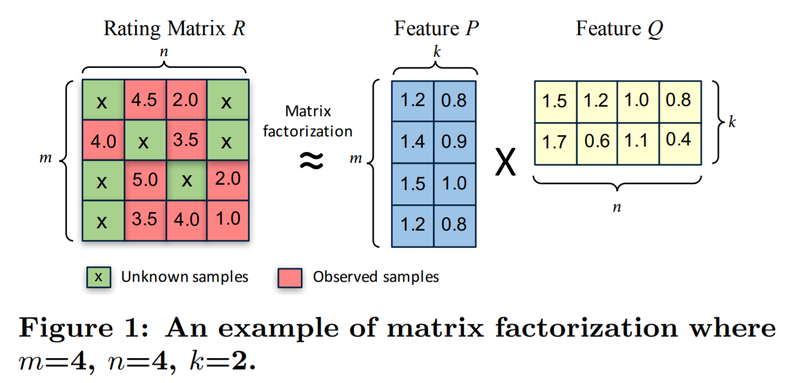<br>
[출처: CuMF_SGD: Fast and Scalable Matrix Factorization(https://arxiv.org/pdf/1610.05838.pdf)]

아래 그림을 다시 한번 봅시다. 위에 소개한 MF 모델의 개요도와 크게 다를 것은 없습니다. 단지, MF 모델을 사용자에게 영화를 추천하는 모델에 대입해서 그려 보았다는 정도의 차이가 있습니다. 위 그림 방식으로 말하자면 m=4, n=5, k=2인 MF 모델이 되겠군요.

위에서 MF 모델은 큰 평가 행렬 R을 두 개의 Feature Matrix P와 Q로 분해한다고 하였습니다.
무엇의 Feature일까요? (m, k) 사이즈의 Feature Matrix P는 k 차원의 벡터를 사용자 수만큼 모아놓은 행렬입니다. 그렇다면 아래 그림에서 첫 번째 벡터 $P_0$ =(1, 0.1)은 바로 빨간 모자를 쓴 첫 번째 사용자의 특성(Feature) 벡터가 됩니다.
같은 방식으로 Q 행렬의 첫 번째 벡터 $Q_0$=(0.9, -0.2)는 해리포터 영화의 특성 벡터가 되겠지요. 
MF 모델은 이 두 벡터를 내적해서 얻어지는 0.88이 바로 $R_{0,0}$ 으로 정의되는 사용자의 영화 선호도로 보는 모델입니다.

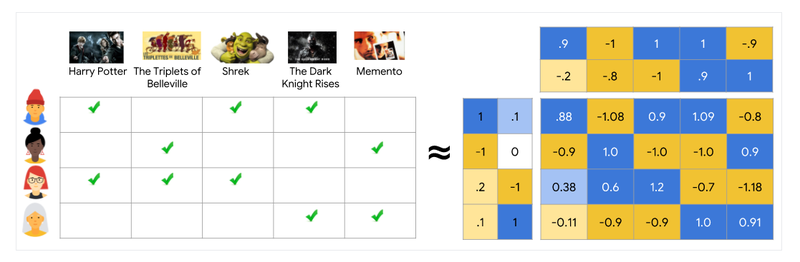<br>
[출처: https://developers.google.com/machine-learning/recommendation/collaborative/matrix]

모델의 목표는 모든 유저와 아이템에 대해 k-dimension의 벡터를 잘 만드는 것입니다.
벡터를 잘 만드는 기준은 유저 i의 벡터($U_i$)와 아이템 j의 벡터($I_j$)를 내적했을 때 유저 i가 아이템 j에 대해 평가한 수치($M_{ij}$)와 비슷한지 입니다.

$$U_i ⋅ I_j = M_{ij}$$


MF에도 다양한 변형이 있습니다. 이번에 사용할 모델은 [Collaborative Filtering for Implicit Feedback Datasets 논문](http://yifanhu.net/PUB/cf.pdf)에서 제안한 모델을 사용할 것입니다.

이 모델의 경우 이전 스텝에서 제가 'black eyed peas'를 play했다는 데이터를 추가했기 때문에 저의 벡터와 black eyed peas의 벡터를 곱했을 때 1에 가까워야 모델이 잘 학습하는 것을 목표로 합니다.

오해할 수 있는데, 제가 black eyed peas를 5번 들었어도 모델이 근사하고자 하는 것이 아티스트를 선호하는지 안 하는지를 맞히는 것이기 때문에 두 벡터를 곱했을 때 5에 가까워지는 대신 1에 가까워져야 합니다.



이를 통해서 제가 들어보지 못한 queen에 대해서도 저의 벡터와 queen의 벡터를 곱하여 수치를 예상할 수 있습니다.



만약 목표가 유저의 재생 횟수를 맞혀야 하는 것(혹은 별점을 맞히는 것)이라면 그에 맞는 다른 모델을 사용해야 합니다. 모델의 구조는 거의 똑같고, 모델의 목표를 재생횟수를 맞히는 쪽으로 놓고 학습(유저와 아이템의 벡터를 만들기)하면 됩니다! 궁금하다면 [참고 자료](https://towardsdatascience.com/recommendation-system-matrix-factorization-d61978660b4b)를 확인해 주세요.




### 13-6. CSR(Compressed Sparse Row) Matrix


유저 X 아이템 평가 행렬을 다시 생각해 봅시다. 유저는 36만 명이고 아티스트는 29만 명입니다. 이를 행렬로 표현하고 행렬의 각 원소에 정수 한 개 (1byte)가 들어간다면 36만 * 29만 * 1byte \approx≈ 97GB가 필요합니다.

~~~
Q7. 평가행렬 용량이 이렇게 커진 이유는 무엇일까요? 혹시 메모리 공간을 낭비하게 되는 요소는 없을까요?

유저 수 X 아티스트 수만큼의 정보 안에는 유저가 들어보지 않은 아티스트에 대한 정보까지 모두 행렬에 포함되어 계산되기 때문입니다. 아무리 많은 아티스트를 들어 본 유저도 수백 명을 넘어갈 만큼의 아티스트를 들어보지 못했는데, 총 아티스트는 29만 명이 넘기 때문에 평가행렬 내의 대부분의 공간은 0으로 채워집니다. 이런 행렬을 Sparse Matrix라고 합니다. 이런 메모리 낭비를 최소화하기 위해서는 유저가 들어본 아티스트에 대해서만 정보만을 저장하면서 전체 행렬 형태를 유추할 수 있는 데이터 구조가 필요합니다.
~~~

참고로 여러분들이 사용하고 계실 컴퓨터의 메모리는 많아야 16GB일 테니 97GB나 되는 거대한 행렬을 메모리에 올려놓고 작업한다는 것은 불가능할 것입니다. 이런 경우의 좋은 대안이 되는 것이 `CSR(Compressed Sparse Row) Matrix` 입니다. 다음 스텝에서 수행할 모델 학습의 input으로 사용할 데이터 타입을 CSR Matrix로 할 것입니다.

CSR Matrix는 Sparse한 matrix에서 0이 아닌 유효한 데이터로 채워지는 데이터의 값과 좌표 정보만으로 구성하여 메모리 사용량을 최소화하면서도 Sparse한 matrix와 동일한 행렬을 표현할 수 있도록 하는 데이터 구조입니다.

CSR Matrix는 data, indices, indptr 로 행렬을 압축하여 표현합니다. 그 원리를 아래 행렬 예시를 통해 설명하겠습니다.



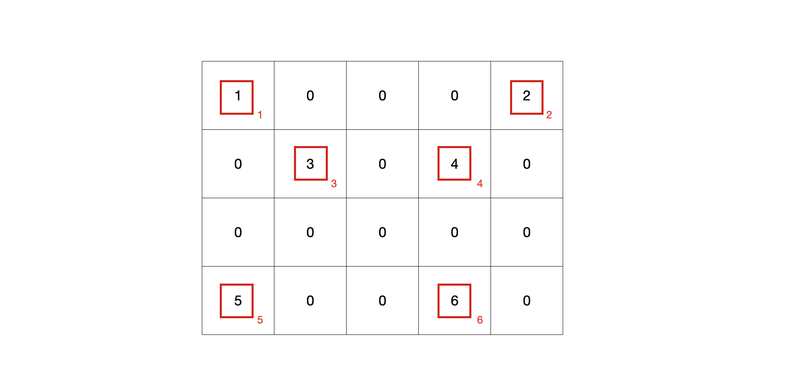

- data는 0이 아닌 원소를 차례로 기입한 값입니다.

> data = [1, 2, 3, 4, 5, 6]

- indices는 data의 각 요소가 어느 열(column)에 있는지를 표현한 index입니다.

> indices = [0, 4, 1, 3, 0, 3]

- indptr은 [최초시작행번호,시작행에서의 데이타 개수,두번째 행에서의 데이타 누적 개수,...,마지막행에서의 데이타 누적개수] 입니다. 이를 통해 data의 요소들이 어느 행(row)에 있는지를 알 수 있습니다.

> indptr = [0, 2, 4, 4, 6]

- 이를 통해 data[0:2]는 첫 번째 행, data[2:4]는 두 번째 행, data[4:4]는 세 번째 행, data[4:6]는 네 번째 행에 위치함을 나타낼 수 있게 됩니다.

~~~
Q8. 다음과 같이 표현되는 CSR Matrix를 (4,4) matrix 형태로 다시 그려 보세요.

data = np.array([1,3,5,6,2,11,7,9,10,12])

indices = np.array([1,2,3,0,1,3,1,2,2,3])

indptr = np.array([0,3,6,8,10])



matrix([[0, 1, 3, 5], [6, 2, 0, 11], [0, 7, 9, 0], [0, 0, 10, 12]])
~~~

- 이제 우리의 data를 CSR Matrix에 맞게 바꿔보겠습니다.


- DataFrame을 만드는 방식이 다양하듯 csr_matrix를 [만드는 방법](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html)은 다양하게 있습니다.


- 현재 data와 같은 데이터 구조에 적합한 방식은 위 링크(혹은 아래 사진)에서 4번째로 설명하고 있는 방법입니다.


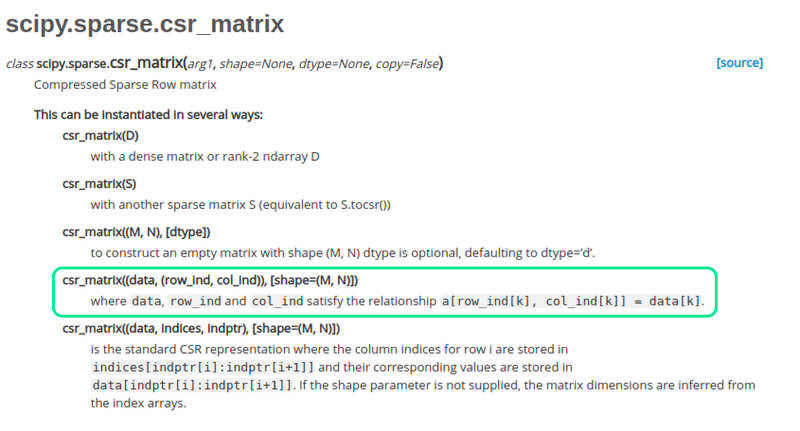<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html

In [15]:
# 실습 위에 설명보고 이해해서 만들어보기
from scipy.sparse import csr_matrix

num_user = data['user_id'].nunique()
num_artist = data['artist'].nunique()

csr_data = csr_matrix((data.play, (data.user_id, data.artist)), shape= (num_user, num_artist))
csr_data

<358869x291347 sparse matrix of type '<class 'numpy.int64'>'
	with 17535578 stored elements in Compressed Sparse Row format>

### 13-7. MF 모델 학습하기


이전 스텝에서 설명한 Matrix Factorization 모델을 [implicit](https://github.com/benfred/implicit) 패키지를 사용하여 학습해 봅시다.

- `implicit` 패키지는 이전 스텝에서 설명한 암묵적(implicit) dataset을 사용하는 다양한 모델을 굉장히 빠르게 학습할 수 있는 패키지입니다.


- 이 패키지에 구현된 `als(AlternatingLeastSquares)` 모델을 사용하겠습니다. `Matrix Factorization` 에서 쪼개진 두 Feature Matrix를 한꺼번에 훈련하는 것은 잘 수렴하지 않기 때문에, 한쪽을 고정시키고 다른 쪽을 학습하는 방식을 번갈아 수행하는 AlternatingLeastSquares 방식이 효과적인 것으로 알려져 있습니다.

In [16]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분입니다. 학습 내용과는 무관합니다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

AlternatingLeastSquares 클래스의 \_\_init\_\_ 파라미터를 살펴보겠습니다.

1. factors : 유저와 아이템의 벡터를 몇 차원으로 할 것인지


2. regularization : 과적합을 방지하기 위해 정규화 값을 얼마나 사용할 것인지


3. use_gpu : GPU를 사용할 것인지


4. iterations : epochs와 같은 의미입니다. 데이터를 몇 번 반복해서 학습할 것인지

1과 4를 늘릴수록 학습 데이터를 잘 학습하게 되지만 과적합의 우려가 있으니 좋은 값을 찾아야 합니다.



In [17]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, use_gpu=False, iterations=15, dtype=np.float32)

In [18]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose해줍니다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<291347x358869 sparse matrix of type '<class 'numpy.int64'>'
	with 17535578 stored elements in Compressed Sparse Column format>

In [19]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

모델 학습이 끝났습니다! 이제 2가지를 아래 사항을 살펴보도록 하겠습니다.



1. Zimin 벡터와 black eyed peas의 __벡터를 어떻게 만들고 있는지__
2. 두 벡터를 __곱하면 어떤 값__이 나오는지

In [20]:
zimin, black_eyed_peas = user_to_idx['zimin'], artist_to_idx['black eyed peas']
zimin_vector, black_eyed_peas_vector = als_model.user_factors[zimin], als_model.item_factors[black_eyed_peas]

print('슝=3')

슝=3


In [21]:
zimin_vector

array([ 0.04442794,  0.01463029,  1.083757  ,  0.61680806,  0.0744976 ,
        1.6712947 ,  0.24145433, -1.4027339 ,  0.4656631 , -0.01092238,
       -0.83763343, -0.28299063, -0.1815332 ,  1.0376538 ,  0.8954825 ,
       -0.39578032, -0.3669239 , -0.4284745 ,  0.38945013, -0.10646395,
       -0.07960542, -0.8817781 ,  0.46694005, -0.5385212 , -0.2358284 ,
       -0.07542668, -0.9180396 , -1.4232911 , -0.3220169 , -0.98079866,
        1.2450216 ,  0.6470976 ,  0.21542165, -0.12549524,  0.41768104,
        0.31982845,  0.81237143,  0.6300263 , -0.16684097, -0.04690136,
       -0.07333519, -0.3630945 , -0.3176558 ,  0.4746994 ,  0.17851545,
       -1.2362516 , -0.09100531, -0.3197275 , -0.2561545 ,  1.6768463 ,
        0.29395324, -0.5926038 ,  0.04226734,  0.06052898,  0.95682037,
        0.39027217, -0.09541396, -0.939769  , -0.6315939 ,  0.1256516 ,
        0.3149782 ,  0.65090907,  0.05713697, -0.81568503, -0.03588566,
        0.7702682 ,  0.542672  ,  0.4937272 ,  0.98953956,  0.92

In [22]:
black_eyed_peas_vector

array([ 0.00885297,  0.01279563,  0.01921077,  0.01016717,  0.00721812,
        0.04449724,  0.00555164,  0.01318964,  0.02785417,  0.00047449,
        0.005629  ,  0.00061408, -0.00131552,  0.01267897,  0.02779461,
       -0.00679489,  0.00073573,  0.00911551,  0.01216087,  0.01108121,
        0.01753687,  0.00875792,  0.02142424, -0.00092633,  0.0031036 ,
        0.00341462, -0.00102656, -0.01360425,  0.00685354, -0.0060783 ,
        0.01938122,  0.00563231,  0.01609774,  0.00976031,  0.00309425,
        0.02491843,  0.01810272,  0.02246764, -0.00126632, -0.00026358,
       -0.00198003,  0.0031897 , -0.0013514 ,  0.02157148,  0.0100277 ,
       -0.01538304,  0.01070316,  0.01053135, -0.00144359,  0.0278316 ,
        0.00282031, -0.00318111, -0.00229297,  0.01567555,  0.01431153,
       -0.00381753,  0.00303066, -0.00914184, -0.00327369,  0.00642677,
        0.01293581,  0.01485403, -0.00621107, -0.00297855,  0.01032201,
        0.01581788,  0.01181783,  0.02063437,  0.01599638,  0.01

In [23]:
# zimin과 black_eyed_peas를 내적하는 코드
np.dot(zimin_vector, black_eyed_peas_vector)

0.53017277

이런, 1이 나와야 될 것 같은데 한참 낮은 수치인 0.49 정도가 나왔습니다. factors를 늘리거나 iterations를 늘려야 할 것 같습니다. 이후 진행되는 내용은 일단 이렇게 학습된 모델을 사용하겠습니다.

~~~
Q9. 만약 이 두 수치를 늘려 1에 가깝게 나왔다면 이 모델이 잘 학습되었다고 볼 수 있을까요?


정답은 아직 검증되지 않았다입니다. 학습 데이터에 대해서 fitting은 되었지만 아직 보지 못한 데이터에 대한, 예를 들어 제가 queen을 선호할지에 대한 예측을 잘할지 못할지는 검증하지 않았기 때문입니다.
~~~

그렇다면 모델이 저의 queen에 대한 선호도를 어떻게 예측할지 한 번 보겠습니다.



In [24]:
queen = artist_to_idx['queen']
queen_vector = als_model.item_factors[queen]
np.dot(zimin_vector, queen_vector)

0.3256109

~~~
Q.10. queen에 대한 선호도를 예측한 결과를 어떻게 해석하면 좋을까요? 사용자와 아티스트 벡터 내적이 0.5를 기준으로 그보다 높으면 모델이 선호한다고 판단했다고 말할 수 있을까요?


모델을 만드는 사람이 정하기 나름입니다. 객관적인 지표로 만들어서 기준을 정할 수도 있고 도메인 경험을 통해 정할 수도 있습니다.
추천 시스템은 다른 머신러닝 task보다 객관적인 평가가 어려운 분야입니다. 사람을 도통 알 수 없기 때문에 객관적인 지표를 정하기 어렵기 때문입니다.
~~~

저는 이러한 알 수 없음 때문에 오히려 이 분야를 더 좋아합니다. 모델을 잘 만들려면 데이터에 대한 이해도가 높아야 하는데 추천 시스템에서 사용하는 데이터는 사람에 대한 데이터이기 때문입니다.

제가 queen을 선호하는지는 저만 알고 있습니다. 여러분이 좋은 모델을 만드셔서 예측해 보시길 바랍니다!

### 13-8. 비슷한 아티스트 찾기 + 유저에게 추천하기

#### 비슷한 아티스트 찾기

<hr>

`AlternatingLeastSquares` 클래스에 구현되어 있는 `similar_items` 메서드를 통하여 비슷한 아티스트를 찾습니다. 처음으로는 제가 좋아하는 `coldplay` 로 찾아보겠습니다.

In [25]:
favorite_artist = 'coldplay'
artist_id = artist_to_idx[favorite_artist]
similar_artist = als_model.similar_items(artist_id, N=15)
similar_artist

[(62, 0.9999999),
 (277, 0.9865831),
 (28, 0.9838268),
 (5, 0.97633094),
 (217, 0.9747888),
 (490, 0.9707977),
 (247, 0.9665321),
 (473, 0.9664393),
 (1018, 0.95263547),
 (694, 0.9516259),
 (418, 0.9505163),
 (910, 0.95010835),
 (55, 0.9500202),
 (782, 0.9467424),
 (268, 0.9446836)]

(아티스트의 id, 유사도) Tuple 로 반환하고 있습니다. 아티스트의 id를 다시 아티스트의 이름으로 매핑 시켜 주겠습니다.

In [26]:
#artist_to_idx 를 뒤집어, index로부터 artist 이름을 얻는 dict를 생성합니다. 
idx_to_artist = {v:k for k,v in artist_to_idx.items()}
[idx_to_artist[i[0]] for i in similar_artist]

['coldplay',
 'muse',
 'the killers',
 'red hot chili peppers',
 'radiohead',
 'oasis',
 'the beatles',
 'placebo',
 'the smashing pumpkins',
 'foo fighters',
 'u2',
 'nirvana',
 'arctic monkeys',
 'the white stripes',
 'pink floyd']

몇 번 더 반복해서 확인하기 위해 위의 코드를 함수로 만들고 확인해 보겠습니다.

In [27]:
def get_similar_artist(artist_name: str):
    artist_id = artist_to_idx[artist_name]
    similar_artist = als_model.similar_items(artist_id)
    similar_artist = [idx_to_artist[i[0]] for i in similar_artist]
    return similar_artist

print("슝=3")

슝=3


저는 힙합도 좋아하기 때문에 `2pac` 으로도 확인해 보겠습니다.

In [28]:
get_similar_artist('2pac')

['2pac',
 'notorious b.i.g.',
 'dr. dre',
 'the game',
 'dmx',
 'jay-z',
 'nas',
 'snoop dogg',
 'ice cube',
 '50 cent']

우와! 스눕독, 닥터 드레, 노토리우스, 나스, 제이지 같은 전설들이 추천됩니다. 힙합의 경우 `마니아`들이 많아서 더 잘 추천되는 것으로 생각됩니다.

~~~
Q11. 마니아는 데이터상에서 표현될 때 어떤 특징을 가질까요?


마니아들은 특정 장르의 아티스트들에게로 선호도가 집중되고, 다른 장르의 아티스트들과는 선호도가 낮게 나타날 것입니다. 이런 마니아들의 존재로 인해 같은 장르의 아티스트들의 벡터들도 더 가까워져서 get_similar_artist시 장르별 특성이 두드러지게 될 것입니다.
~~~

In [29]:
get_similar_artist('lady gaga')

['lady gaga',
 'britney spears',
 'rihanna',
 'katy perry',
 'beyoncé',
 'the pussycat dolls',
 'kelly clarkson',
 'christina aguilera',
 'pink',
 'leona lewis']

lady gaga의 경우 여자 아티스트들이 추천되고 있습니다.



#### 유저에게 아티스트 추천하기

<hr>

`AlternatingLeastSquares` 클래스에 구현되어 있는 `recommend` 메서드를 통하여 제가 좋아할 만한 아티스트를 추천받습니다. `filter_already_liked_items` 는 유저가 이미 평가한 아이템은 제외하는 Argument입니다.

In [30]:
user = user_to_idx['zimin']
# recommend에서는 user*item CSR Matrix를 받습니다.
artist_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
artist_recommended

[(350, 0.4677414),
 (369, 0.44836038),
 (550, 0.44792584),
 (354, 0.43669534),
 (1800, 0.41825148),
 (2249, 0.415073),
 (391, 0.41321546),
 (355, 0.40746284),
 (627, 0.39635307),
 (5555, 0.380932),
 (618, 0.3788394),
 (621, 0.37592053),
 (274, 0.36904514),
 (724, 0.3684768),
 (901, 0.36672884),
 (944, 0.35464454),
 (1777, 0.35225958),
 (5, 0.35124877),
 (434, 0.3510536),
 (409, 0.35020322)]

In [31]:
[idx_to_artist[i[0]] for i in artist_recommended]

['rihanna',
 'justin timberlake',
 'britney spears',
 'nelly furtado',
 'lady gaga',
 'katy perry',
 'christina aguilera',
 'madonna',
 'maroon 5',
 'timbaland',
 'the pussycat dolls',
 'alicia keys',
 'michael jackson',
 'lily allen',
 'pink',
 'avril lavigne',
 'mariah carey',
 'red hot chili peppers',
 'eminem',
 'amy winehouse']

`rihanna` 를 추천해 주고 있네요. 모델은 왜 `rihanna` 를 추천해 줬을까요? `AlternatingLeastSquares` 클래스에 구현된 `explain` 메서드를 사용하면 제가 기록을 남긴 데이터 중 __이 추천에 기여한 정도__를 확인할 수 있습니다.

In [32]:
rihanna = artist_to_idx['rihanna']
explain = als_model.explain(user, csr_data, itemid=rihanna)

이 method는 추천한 콘텐츠의 점수에 기여한 다른 콘텐츠와 기여도(합이 콘텐츠의 점수가 됩니다.)를 반환합니다. 어떤 아티스트들이 이 추천에 얼마나 기여하고 있는 걸까요?



In [33]:
[(idx_to_artist[i[0]], i[1]) for i in explain[1]]

[('beyoncé', 0.2319524348107765),
 ('black eyed peas', 0.16747584960991493),
 ('jason mraz', 0.0370027399436809),
 ('coldplay', 0.032473969109386464),
 ('maroon5', 0.000472754522755779)]

`beyoncé` 와 `black eyed peas` 가 가장 크게 기여했네요. 둘 다 흑인 아티스트이고 `beyoncé` 의 경우는 같은 성별이라는 점도 크게 작용하지 않았을까 싶습니다.



눈치채신 분도 있겠지만 결과가 조금 이상합니다. `filter_already_liked_items=True` 로 했는데 앞에 `maroon 5` 는 제가 이미 평가한 아이템이 나오고 있습니다. 이것은 implicit 버전 0.4.2에서 생긴 버그입니다. 코드는 사람이 만들기 때문에 이렇게 실수할 가능성이 있습니다.
오픈 소스 생태계에서는 누구든 이런 [문제점을 지적](https://github.com/benfred/implicit/issues/365
)하고 [Pull Request](https://github.com/benfred/implicit/pull/389
)를 통하여 수정을 제안할 수 있습니다.
많이들 사용하는 Tensorflow나 numpy, pandas도 여러 작은 버그들이 있습니다. 이런 유명한 패키지의 오류를 고쳐서 Pull Request를 하여 Contribute 한다면 좋은 이력이 되기도 합니다.

모델이 추천한 20개 중 몇 개를 실제로 선호하는지 계산하여 모델의 객관적인 지표를 만들 수 있을 것 같습니다. 자세한 방법은 [이쪽](https://danthetech.netlify.app/DataScience/evaluation-metrics-for-recommendation-system
)을 참고해 주세요.



#### 마무리

<hr>

후~ 고생 많으셨습니다!
추천 시스템에서 Baseline으로 많이 사용되는 MF를 통해 유저에게 아티스트를 추천해 보았습니다. 이제 여러분은 추천 시스템 관련 task에서 기본 모델을 만드실 수 있을 겁니다.

그러나 우리가 만든 모델은 몇 가지 아쉬운 점이 있습니다.

1. 유저, 아티스트에 대한 Meta 정보를 반영하기 쉽지 않습니다. 연령대별로 음악 취향이 굉장히 다르지 않을까요?


2. 유저가 언제 play 했는지에 반영하기 쉽지 않습니다. 10년 전에 즐겨듣던 아티스트와 지금 즐겨듣는 아티스트를 비교해 보세요.


이러한 이유와 딥러닝의 발전으로 MF 이외의 모델 구조도 많이 연구/ 사용되고 있습니다. 하지만 어떤 추천 모델도 핵심은 MF와 비슷합니다.
유저와 아이템에 대한 벡터를 잘 학습하여 취향에 맞게(유저에 맞게) 아이템을 보여주거나(Retrieval) 걸러내는(Filtering) 역할입니다.

&nbsp;

### 13-9. 프로젝트 - Movielens 영화 추천 실습


이전 스텝에서 배운 MF 모델 학습 방법을 토대로, 내가 좋아할 만한 영화 추천 시스템을 제작해 보겠습니다.

이번에 활용할 데이터셋은 추천 시스템의 MNIST라고 부를만한 Movielens 데이터입니다.


- 유저가 영화에 대해 평점을 매긴 데이터가 데이터 크기 별로 있습니다. `MovieLens 1M Dataset` 사용을 권장합니다.


- 별점 데이터는 대표적인 explicit 데이터입니다. 하지만 implicit 데이터로 간주하고 테스트해 볼 수 있습니다.


- 별점을 `시청횟수`로 해석해서 생각하겠습니다.


- 또한 유저가 3점 미만으로 준 데이터는 선호하지 않는다고 가정하고 제외하겠습니다.


Cloud Storage에 미리 업로드된 ml-1m폴더 내 파일을 심볼릭 링크로 개인 storage에 연결해 줍니다.

Cloud shell에서 아래 명령어를 입력해 주세요.

~~~
    $ mkdir -p ~/aiffel/recommendata_iu/data/ml-1m
    $ ln -s ~/data/ml-1m/* ~/aiffel/recommendata_iu/data/ml-1m
~~~

프로젝트에 필요한 주요 라이브러리 버전을 확인해봅시다.



In [34]:
import numpy as np
import scipy
import implicit

print(np.__version__)
print(scipy.__version__)
print(implicit.__version__)

1.21.4
1.7.1
0.4.8


### 1) 데이터 준비와 전처리

<hr>
    
Movielens 데이터는 rating.dat 안에 이미 인덱싱까지 완료된 사용자-영화-평점 데이터가 깔끔하게 정리되어 있습니다.

In [35]:
import os
rating_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/ratings.dat'
ratings_cols = ['user_id', 'movie_id', 'ratings', 'timestamp']
ratings = pd.read_csv(rating_file_path, sep='::', names=ratings_cols, engine='python', encoding = "ISO-8859-1")
orginal_data_size = len(ratings)
ratings.head()

,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [36]:
# 3점 이상만 남깁니다.
ratings = ratings[ratings['ratings']>=3]
filtered_data_size = len(ratings)

print(f'orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}')

orginal_data_size: 1000209, filtered_data_size: 836478
Ratio of Remaining Data is 83.63%


In [37]:
# ratings 컬럼의 이름을 counts로 바꿉니다.
ratings.rename(columns={'ratings':'counts'}, inplace=True)

In [38]:
ratings['counts']

0          5
1          3
2          3
3          4
4          5
          ..
1000203    3
1000205    5
1000206    5
1000207    4
1000208    4
Name: counts, Length: 836478, dtype: int64

In [39]:
# 영화 제목을 보기 위해 메타 데이터를 읽어옵니다.
movie_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/movies.dat'
cols = ['movie_id', 'title', 'genre'] 
movies = pd.read_csv(movie_file_path, sep='::', names=cols, engine='python', encoding='ISO-8859-1')
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


여기까지가 전처리입니다. 이후에는 이전 스텝에 소개했던 것과 동일한 방식으로 MF model을 구성하여 내가 좋아할 만한 영화를 추천해 볼 수 있습니다.



In [40]:
#[[ your code ]]

### 2) 분석해 봅시다.

<hr>

- ratings에 있는 유니크한 영화 개수

- ratings에 있는 유니크한 사용자 수

- 가장 인기 있는 영화 30개(인기순)

In [41]:
#[[ your code ]]

### 3) 내가 선호하는 영화를 5가지 골라서 ratings에 추가해 줍시다.

<hr>


In [42]:
#[[ your code ]]

### 4) CSR matrix를 직접 만들어 봅시다.

<hr>

In [43]:
#[[ your code ]]

### 5) als_model = AlternatingLeastSquares 모델을 직접 구성하여 훈련시켜 봅시다.

<hr>

In [ ]:
#[[ your code ]]

### 6) 내가 선호하는 5가지 영화 중 하나와 그 외의 영화 하나를 골라 <br>훈련된 모델이 예측한 나의 선호도를 파악해 보세요.

<hr>

In [ ]:
#[[ your code ]]

### 7) 내가 좋아하는 영화와 비슷한 영화를 추천받아 봅시다.

<hr>

In [44]:
#[[ your code ]]

### 8) 내가 가장 좋아할 만한 영화들을 추천받아 봅시다.


<hr>

In [45]:
#[[ your code ]]

&nbsp;

<hr>

# Exploration Project 13


### Recommendation system

<hr>

## ▣ 추천 시스템의 개념과 목적 정리


#### ▶ 추천 시스템(Recommender System) ：추천 시스템을 통한 개인화 서비스


 - __나와 비슷한 다른 사용자들이 좋아하는 것과 비슷한 것을 내게 추천해 준다__
 
 
 - 아이템이 매우 많고, 유저의 취향이 다양할 때, 유저가 소비할 만한 아이템을 예측하는 모델
 
 

#### ▶ 컨텐츠 추천 알고리즘의 진화


 |협업 필터링|컨텐츠 기반 필터링|
 |:----------|:-----------------|
 |아이템 구매 이력 정보만으로 사용자 간 유사성 및 아이템 간 유사성 파악|아이템의 고유의 정보를 바탕으로 아이템 간 유사성 파악|
 |아이템과 사용자 간의 행동 또는 관계에만 주목|아이템 자체의 속성에만 주목|


 #### ▶ 협업 필터링：다수의 사용자의 판단을 기반으로 정확한 추천을 가능하게 하는 추천 시스템의 핵심
 

- 협업 필터링의 제약조건
   

  + 시스템이 충분한 정보를 모으지 못한 사용자나 아이템에 대한 추론을 할 수 없는 상태인 콜드 스타트(Cold Start) 상황


  + 계산량이 너무 많아 추천의 효율이 떨어지는 상황


+ 롱테일의 꼬리 부분, 즉 사용자의 관심이 저조한 항목의 정보가 부족하여 추천에서 배제되는 상황



 #### ▶ 콘텐츠 기반 필터링
 
 
 - 사용자에 대한 아무런 초기 정보가 없는 상황이면 콘텐츠 기반 필터링 방식의 추천 가능.
 
 
 - 필터버블：처음 추천받은 콘텐츠 위주로만 시청하게 되는 문제점
 
 
 - 추천의 다양성을 저해할 수 있는 위험이 있다.

 

&nbsp;

## ▣ 프로젝트 - Movielens 영화 추천 실습

~~~
    이전 스텝에서 배운 MF 모델 학습 방법을 토대로, 내가 좋아할 만한 영화 추천 시스템을 제작해 보겠습니다.

    이번에 활용할 데이터셋은 추천 시스템의 MNIST라고 부를만한 Movielens 데이터입니다.
   
    ㆍ 유저가 영화에 대해 평점을 매긴 데이터가 데이터 크기 별로 있습니다. `MovieLens 1M Dataset` 사용을 권장합니다.
    
    ㆍ 별점 데이터는 대표적인 explicit 데이터입니다. 하지만 implicit 데이터로 간주하고 테스트해 볼 수 있습니다.
    
    ㆍ 별점을 __시청횟수__로 해석해서 생각하겠습니다.
    
    ㆍ 또한 유저가 3점 미만으로 준 데이터는 선호하지 않는다고 가정하고 제외하겠습니다.
~~~

프로젝트에 필요한 주요 라이브러리 버전을 확인해보자.


In [1]:
import numpy as np
import scipy
import implicit

import pandas as pd
import os

## CSR Matrix
from scipy.sparse import csr_matrix

## als(AlternatingLeastSquares) Model
from implicit.als import AlternatingLeastSquares


print(np.__version__)
print(scipy.__version__)
print(implicit.__version__)

1.21.4
1.7.1
0.4.8


&nbsp;

### 1) 데이터 준비와 전처리

<hr>

#### ▶ ratings 데이터 확인

Movielens 데이터는 rating.dat 안에 이미 인덱싱까지 완료된 사용자-영화-평점 데이터이다.

In [2]:
import os
rating_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/ratings.dat'
ratings_cols = ['user_id', 'movie_id', 'ratings', 'timestamp']
ratings = pd.read_csv(rating_file_path, sep='::', names=ratings_cols, engine='python', encoding = "utf8")
orginal_data_size = len(ratings)

In [3]:
ratings.head()

,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
ratings.tail()

,user_id,movie_id,ratings,timestamp
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


유저가 3점 미만으로 준 데이터는 선호하지 않는다고 가정하고 제외하자.

In [5]:
# 3점 이상만 남깁니다.
ratings = ratings[ratings['ratings']>=3]
filtered_data_size = len(ratings)

print(f'orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}')

orginal_data_size: 1000209, filtered_data_size: 836478
Ratio of Remaining Data is 83.63%


3점 미만의 데이터를 삭제하고 남은 데이터는 약 83％ 정도이다.

별점을 __시청횟수__ 로 해석하고자 한다고 했다.

컬럼명도 바꾸도록 하겠다.

In [6]:
# ratings 컬럼의 이름을 counts로 바꿉니다.
ratings.rename(columns={'ratings':'counts'}, inplace=True)

In [7]:
ratings.tail()

,user_id,movie_id,counts,timestamp
1000203,6040,1090,3,956715518
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


timestamp 컬럼은 사용할 일이 없을 것 같다. 삭제하도록 하겠다.

In [8]:
ratings = ratings[["user_id", "movie_id", "counts"]]

In [9]:
ratings.tail()

,user_id,movie_id,counts
1000203,6040,1090,3
1000205,6040,1094,5
1000206,6040,562,5
1000207,6040,1096,4
1000208,6040,1097,4


혹시 결측치가 있는지 확인 해 보자.

In [10]:
ratings.isna().sum()

user_id     0
movie_id    0
counts      0
dtype: int64

결측치는 보이지 않는다.

&nbsp;

▶ movies 데이터 확인

영화제목을 한번 확인 해 보자.

In [11]:
# 영화 제목을 보기 위해 메타 데이터를 읽어옵니다.
movie_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/movies.dat'
cols = ['movie_id', 'title', 'genre'] 
movies = pd.read_csv(movie_file_path, sep='::', names=cols, engine='python', encoding='ISO-8859-1')
movies.tail()

,movie_id,title,genre
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


노드 실습 부분에 따라, 영화 이름 검색 쉽게 하고자 소문자로 바꾸는 것… 보다는, 

영화 이름을 가져오는 함수를 만들도록 하는게 좋을 것 같다.

In [12]:
def get_movie_title(movie_id):
    return movies[movies["movie_id"] == movie_id]["title"].tolist().pop()

get_movie_title(3950)

'Tigerland (2000)'

&nbsp;

### 2) 데이터 탐색

<hr>

▶ ratings 에 있는 유니크한 영화 개수

In [13]:
ratings["movie_id"].nunique()

3628

▶ ratings 에 있는 유니크한 사용자 수

In [14]:
ratings["user_id"].nunique()

6039

그리고 두개의 데이터프레임을 합쳐서 새로운 테이블을 만들도록 하겠다.

In [15]:
print ("len(ratings) :", len(ratings))
print ("len(movies) :", len(movies))

len(ratings) : 836478
len(movies) : 3883


ratings 에 맞추어 영화 이름을 넣어서 활용할 것이므로 새로운 변수를 만들도록 하겠다.

genre 나 title 같은 내용에 중복이 많으므로, 실제 학습에 사용하진 않을 수도 있다.

In [16]:
movlens = pd.merge(ratings, movies, left_on="movie_id", right_on="movie_id", how="left")

In [17]:
movlens.tail()

,user_id,movie_id,counts,title,genre
836473,6040,1090,3,Platoon (1986),Drama|War
836474,6040,1094,5,"Crying Game, The (1992)",Drama|Romance|War
836475,6040,562,5,Welcome to the Dollhouse (1995),Comedy|Drama
836476,6040,1096,4,Sophie's Choice (1982),Drama
836477,6040,1097,4,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi


▶ 가장 인기 있는 영화 30개(인기순)

In [18]:
popular_movie = movlens.groupby(["title"])["user_id"].count()
print(type(popular_movie))
popular_movie.sort_values(ascending=False).head(30)

<class 'pandas.core.series.Series'>


title
American Beauty (1999)                                   3211
Star Wars: Episode IV - A New Hope (1977)                2910
Star Wars: Episode V - The Empire Strikes Back (1980)    2885
Star Wars: Episode VI - Return of the Jedi (1983)        2716
Saving Private Ryan (1998)                               2561
Terminator 2: Judgment Day (1991)                        2509
Silence of the Lambs, The (1991)                         2498
Raiders of the Lost Ark (1981)                           2473
Back to the Future (1985)                                2460
Matrix, The (1999)                                       2434
Jurassic Park (1993)                                     2413
Sixth Sense, The (1999)                                  2385
Fargo (1996)                                             2371
Braveheart (1995)                                        2314
Men in Black (1997)                                      2297
Schindler's List (1993)                                  2257
Pr

유저들이 몇 개의 영화를 봤는지에 대한 통계

In [19]:
user_count = movlens.groupby('user_id')['movie_id'].count()
user_count.describe()

count    6039.000000
mean      138.512668
std       156.241599
min         1.000000
25%        38.000000
50%        81.000000
75%       177.000000
max      1968.000000
Name: movie_id, dtype: float64

In [20]:
# 유저별 play횟수 중앙값에 대한 통계
user_median = movlens.groupby('user_id')['counts'].median()
user_median.describe()

count    6039.000000
mean        4.055970
std         0.432143
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: counts, dtype: float64

&nbsp;

### 3) 내가 선호하는 영화를 5가지 골라서 ratings에 추가해 줍시다.

<hr>


▶ 영화 이름을 통해 movie_id 가져오는 함수를 만들도록 하겠다.

 - 추천 시스템의 경우, 처음 가입하는 사용자의 취향과 유사한 정보를 5개이상 입력받는 과정을 거치는 경우가 많은데,<br>
 여기서 수행하는 과정이, 모델 검증에 사용하기 위한 나의 취향을 5개 이상 추가해주는 과정이라 보면 되겠다.
 
 
 - 우선은 영화 검색은 movies 데이터프레임 에서만 하도록 하겠다.
 
 
 - movies 의 title 항목을 모두 소문자로 바꾸도록 하겠다.
 
 
 - user_id 에는 신규로 나를 추가하여야 한다.
 
 
 - 해당 작업은 ratings 에 추가하도록 하겠다.

In [21]:
movies["title"] = movies["title"].str.lower()

이번에는 영화 타이틀 이름을 매개변수로 하여 그 이름이 포함되는 영화 목록을 출력하는 함수를 만들도록 하겠다.

In [27]:
def find_movie_id(title):
    movie_ids = movies[movies["title"].str.contains(title)]
    print(movie_ids)

내가 매우 좋아하는 영화중에 하나인 에일리언을 검색해 보도록 하겠다.

In [28]:
find_movie_id("alien")

      movie_id                       title                          genre
1182      1200               aliens (1986)     Action|Sci-Fi|Thriller|War
1196      1214                alien (1979)  Action|Horror|Sci-Fi|Thriller
1300      1320               alien³ (1992)  Action|Horror|Sci-Fi|Thriller
1644      1690  alien: resurrection (1997)           Action|Horror|Sci-Fi
1645      1692         alien escape (1995)                  Horror|Sci-Fi
3632      3701         alien nation (1988)             Crime|Drama|Sci-Fi


터미네이터가 빠질 수 없다.

In [29]:
find_movie_id("terminator")

      movie_id                              title                   genre
585        589  terminator 2: judgment day (1991)  Action|Sci-Fi|Thriller
1220      1240             terminator, the (1984)  Action|Sci-Fi|Thriller


다이 하드도 매우 좋아한다.

In [35]:
find_movie_id("die hard")

      movie_id                              title            genre
163        165  die hard: with a vengeance (1995)  Action|Thriller
1023      1036                    die hard (1988)  Action|Thriller
1349      1370                  die hard 2 (1990)  Action|Thriller


명작 세븐도 있다.

In [36]:
find_movie_id("se7en")

    movie_id                 title           genre
46        47  seven (se7en) (1995)  Crime|Thriller


양들의 침묵도 재밌다.

In [32]:
find_movie_id("lambs")

     movie_id                             title           genre
589       593  silence of the lambs, the (1991)  Drama|Thriller


이상의 내용을 토대로, 좋아하는 영화의 목록을 작성하도록 하겠다.
~~~


대~충 긁어봤다.

          movie_id                       title                          genre
1182      1200               aliens (1986)     Action|Sci-Fi|Thriller|War
1196      1214                alien (1979)  Action|Horror|Sci-Fi|Thriller
1300      1320               alien³ (1992)  Action|Horror|Sci-Fi|Thriller
1644      1690  alien: resurrection (1997)           Action|Horror|Sci-Fi
585        589  terminator 2: judgment day (1991)  Action|Sci-Fi|Thriller
1220      1240             terminator, the (1984)  Action|Sci-Fi|Thriller
163        165  die hard: with a vengeance (1995)  Action|Thriller
1023      1036                    die hard (1988)  Action|Thriller
1349      1370                  die hard 2 (1990)  Action|Thriller
46        47  seven (se7en) (1995)  Crime|Thriller
589       593  silence of the lambs, the (1991)  Drama|Thriller


위 목록들 중에 필요한 것만 정리하면 아래의 표의 내용과 같다.


~~~~



|movie_id|title|
|:----:|:------:|
|1200|aliens (1986)|
|1214|alien (1979)|
|1320|alien³ (1992)|
|1690|alien: resurrection|
|589|terminator 2: judgment day (1991)|
|1240|terminator, the (1984)|
|1036|die hard (1988)|
|1370|die hard 2 (1990)|
|47|seven (se7en) (1995)|
|593|silence of the lambs, the (1991)|


여기서 movie_id 만 필요하므로 이 값들을 다시 따로 모아주겠다.

In [38]:
movlens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836478 entries, 0 to 836477
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   836478 non-null  int64 
 1   movie_id  836478 non-null  int64 
 2   counts    836478 non-null  int64 
 3   title     836478 non-null  object
 4   genre     836478 non-null  object
dtypes: int64(3), object(2)
memory usage: 38.3+ MB


여기서 movie_id 는 숫자값임을 확인할 수 있다.

곧 user_id 도 필요할텐데, 숫자값임을 미리 확인할 수 있다. 잘 된 일이다.

우선 movie_id 는 아래와 같이 정리해 두면 되겠다.

In [44]:
my_favor_mov = [1200, 1214, 1320, 1690, 589, 1240, 1036, 1370, 47, 593]

내 user_id 값으로는 몇을 지정하면 좋을까 확인해보자.

user_id 는 숫자값이기 때문에 정렬을 하면 제일 큰 값을 확인 할 수 있다.

In [41]:
movlens.sort_values("user_id").tail(5)

,user_id,movie_id,counts,title,genre
836290,6040,2575,4,"Dreamlife of Angels, The (La Vie rêvée des ang...",Drama
836289,6040,2571,4,"Matrix, The (1999)",Action|Sci-Fi|Thriller
836288,6040,1912,3,Out of Sight (1998),Action|Crime|Romance
836294,6040,2580,4,Go (1999),Crime
836477,6040,1097,4,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi


user_id 는 6041 을 사용하면 될 것 같다.

이제 내가 좋아하는 영화들을 기존 데이터에 추가해서 넣어보자.

In [45]:
len(my_favor_mov)

10

In [46]:
# '6041' 이라는 user_id가, 위 영화들을  5회씩 봤다고 가정
my_movie_list = pd.DataFrame({'user_id': [6041] * len(my_favor_mov) , 'movie_id': my_favor_mov, 'counts':[5] * len(my_favor_mov)})

In [48]:
# user_id에 '6041'이라는 데이터가 없다면, 임의로 만든 my_favor_mov 데이터를 추가한다.
if not ratings.isin({'user_id':[6041]})['user_id'].any():
    ratings = ratings.append(my_movie_list)

값이 잘 들어갔는지 확인해 보자.

In [49]:
ratings.tail(15)

,user_id,movie_id,counts
1000203,6040,1090,3
1000205,6040,1094,5
1000206,6040,562,5
1000207,6040,1096,4
1000208,6040,1097,4
0,6041,1200,5
1,6041,1214,5
2,6041,1320,5
3,6041,1690,5
4,6041,589,5


맨 앞의 숫자는 어차피 필요가 없으니까 신경 안써도 된다.

실제 데이터는 user_id, movie_id, counts 컬럼만 사용할 것이다.

그래도 필요하다면, 다시 한번 정리를 하도록 하겠지만 지금은 일단 진행해보겠다.

In [50]:
ratings.nunique()

user_id     6040
movie_id    3628
counts         3
dtype: int64

▶ 모델에 활용하기 위한 전처리

 이제 indexing 작업을 하도록 하자. 

In [54]:
# 고유한 유저, 영화를 찾아내는 코드
user_unique = ratings['user_id'].unique()
movie_unique = ratings['movie_id'].unique()

# 유저, 아티스트 indexing 하는 코드 idx는 index의 약자입니다.
user_to_idx = {v:k for k,v in enumerate(user_unique)}
movie_to_idx = {v:k for k,v in enumerate(movie_unique)}

인덱싱이 잘 되었는지 확인해 보자.

In [56]:
# 인덱싱이 잘 되었는지 확인해 봅니다. 
print(user_to_idx[6041])    ## 내가 입력한 ID 이다
print(movie_to_idx[1200])    ## 1200 aliens (1986)200 aliens (1986)

6039
651


In [57]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드
# dictionary 자료형의 get 함수는 https://wikidocs.net/16 을 참고하세요.

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해 봅시다. 
# 혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될 테니 dropna()로 제거합니다. 
temp_user_data = ratings['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(ratings):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    ratings['user_id'] = temp_user_data   # data['user_id']을 인덱싱된 Series로 교체해 줍니다. 
else:
    print('user_id column indexing Fail!!')

# movie_to_idx을 통해 movie 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
temp_movie_data = ratings['movie_id'].map(movie_to_idx.get).dropna()
if len(temp_movie_data) == len(ratings):
    print('movie column indexing OK!!')
    ratings['movie_id'] = temp_movie_data
else:
    print('movie column indexing Fail!!')


user_id column indexing OK!!
movie column indexing OK!!


In [58]:
ratings

,user_id,movie_id,counts
0,0,0,5
1,0,1,3
2,0,2,3
3,0,3,4
4,0,4,5
...,...,...,...
5,6039,200,5
6,6039,194,5
7,6039,111,5
8,6039,220,5


&nbsp;

### 4) CSR matrix를 직접 만들어 봅시다.

<hr>

▶ Matrix Factorization(MF)
  
  - User와 Item 간의 평가 정보를 나타내는 Rating Matrix를 User Latent Matrix와 Item Latent Matrix로 분해하는 기법을 말한다.
  
  - Rating Matrix는 (User의 수) * (Item의 수)로 구성된 행렬인데, 이때 각 칸에는<br>각 유저가 기록한 해당 아이템에 대한 평가가 수치로써 기록된다. 물론 비어있는 부분이 보통은 더 많다.
  
  - Rating Matrix는 왠만하면 Sparse Matrix가 되기 마련인데, MF는 이러한 행렬 분해 과정에서<br>이러한 빈칸을 채울만한 평점을 예측하는 과정이라고 볼 수 있다.


  - 기본 아이디어
  
    + (m,n) 사이즈의 행렬 R 을
    
    + (m,k) 사이즈의 행렬 P 와
    
    + (k,n) 사이즈의 행렬 Q 로 분해한다면
    
    + R 은 그저 P 와 Q 의 행렬곱으로 표현 가능하다.
    
    (이하의 그림의 R, P, Q 와 가로 세로 m,k,n 참고)
   

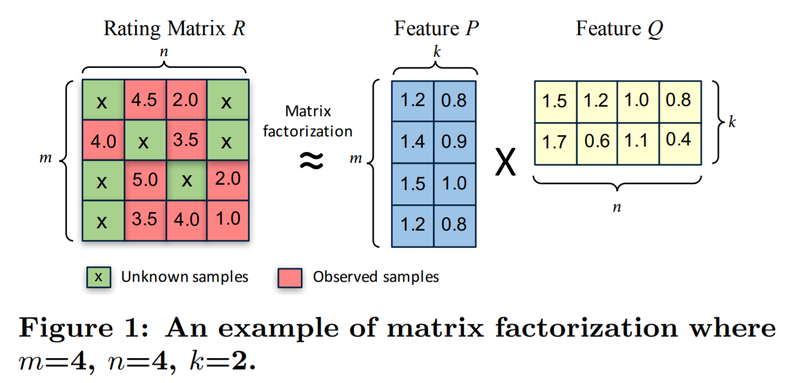<br>
[출처: CuMF_SGD: Fast and Scalable Matrix Factorization(https://arxiv.org/pdf/1610.05838.pdf)]

&nbsp;

▶ CSR(Compressed Sparse Row) Matrix

 - Sparse한 matrix에서 0이 아닌 유효한 데이터로 채워지는 데이터의 값과 좌표 정보만으로 구성하여<br>
 메모리 사용량을 최소화하면서도 Sparse한 matrix와 동일한 행렬을 표현할 수 있도록 하는 데이터 구조


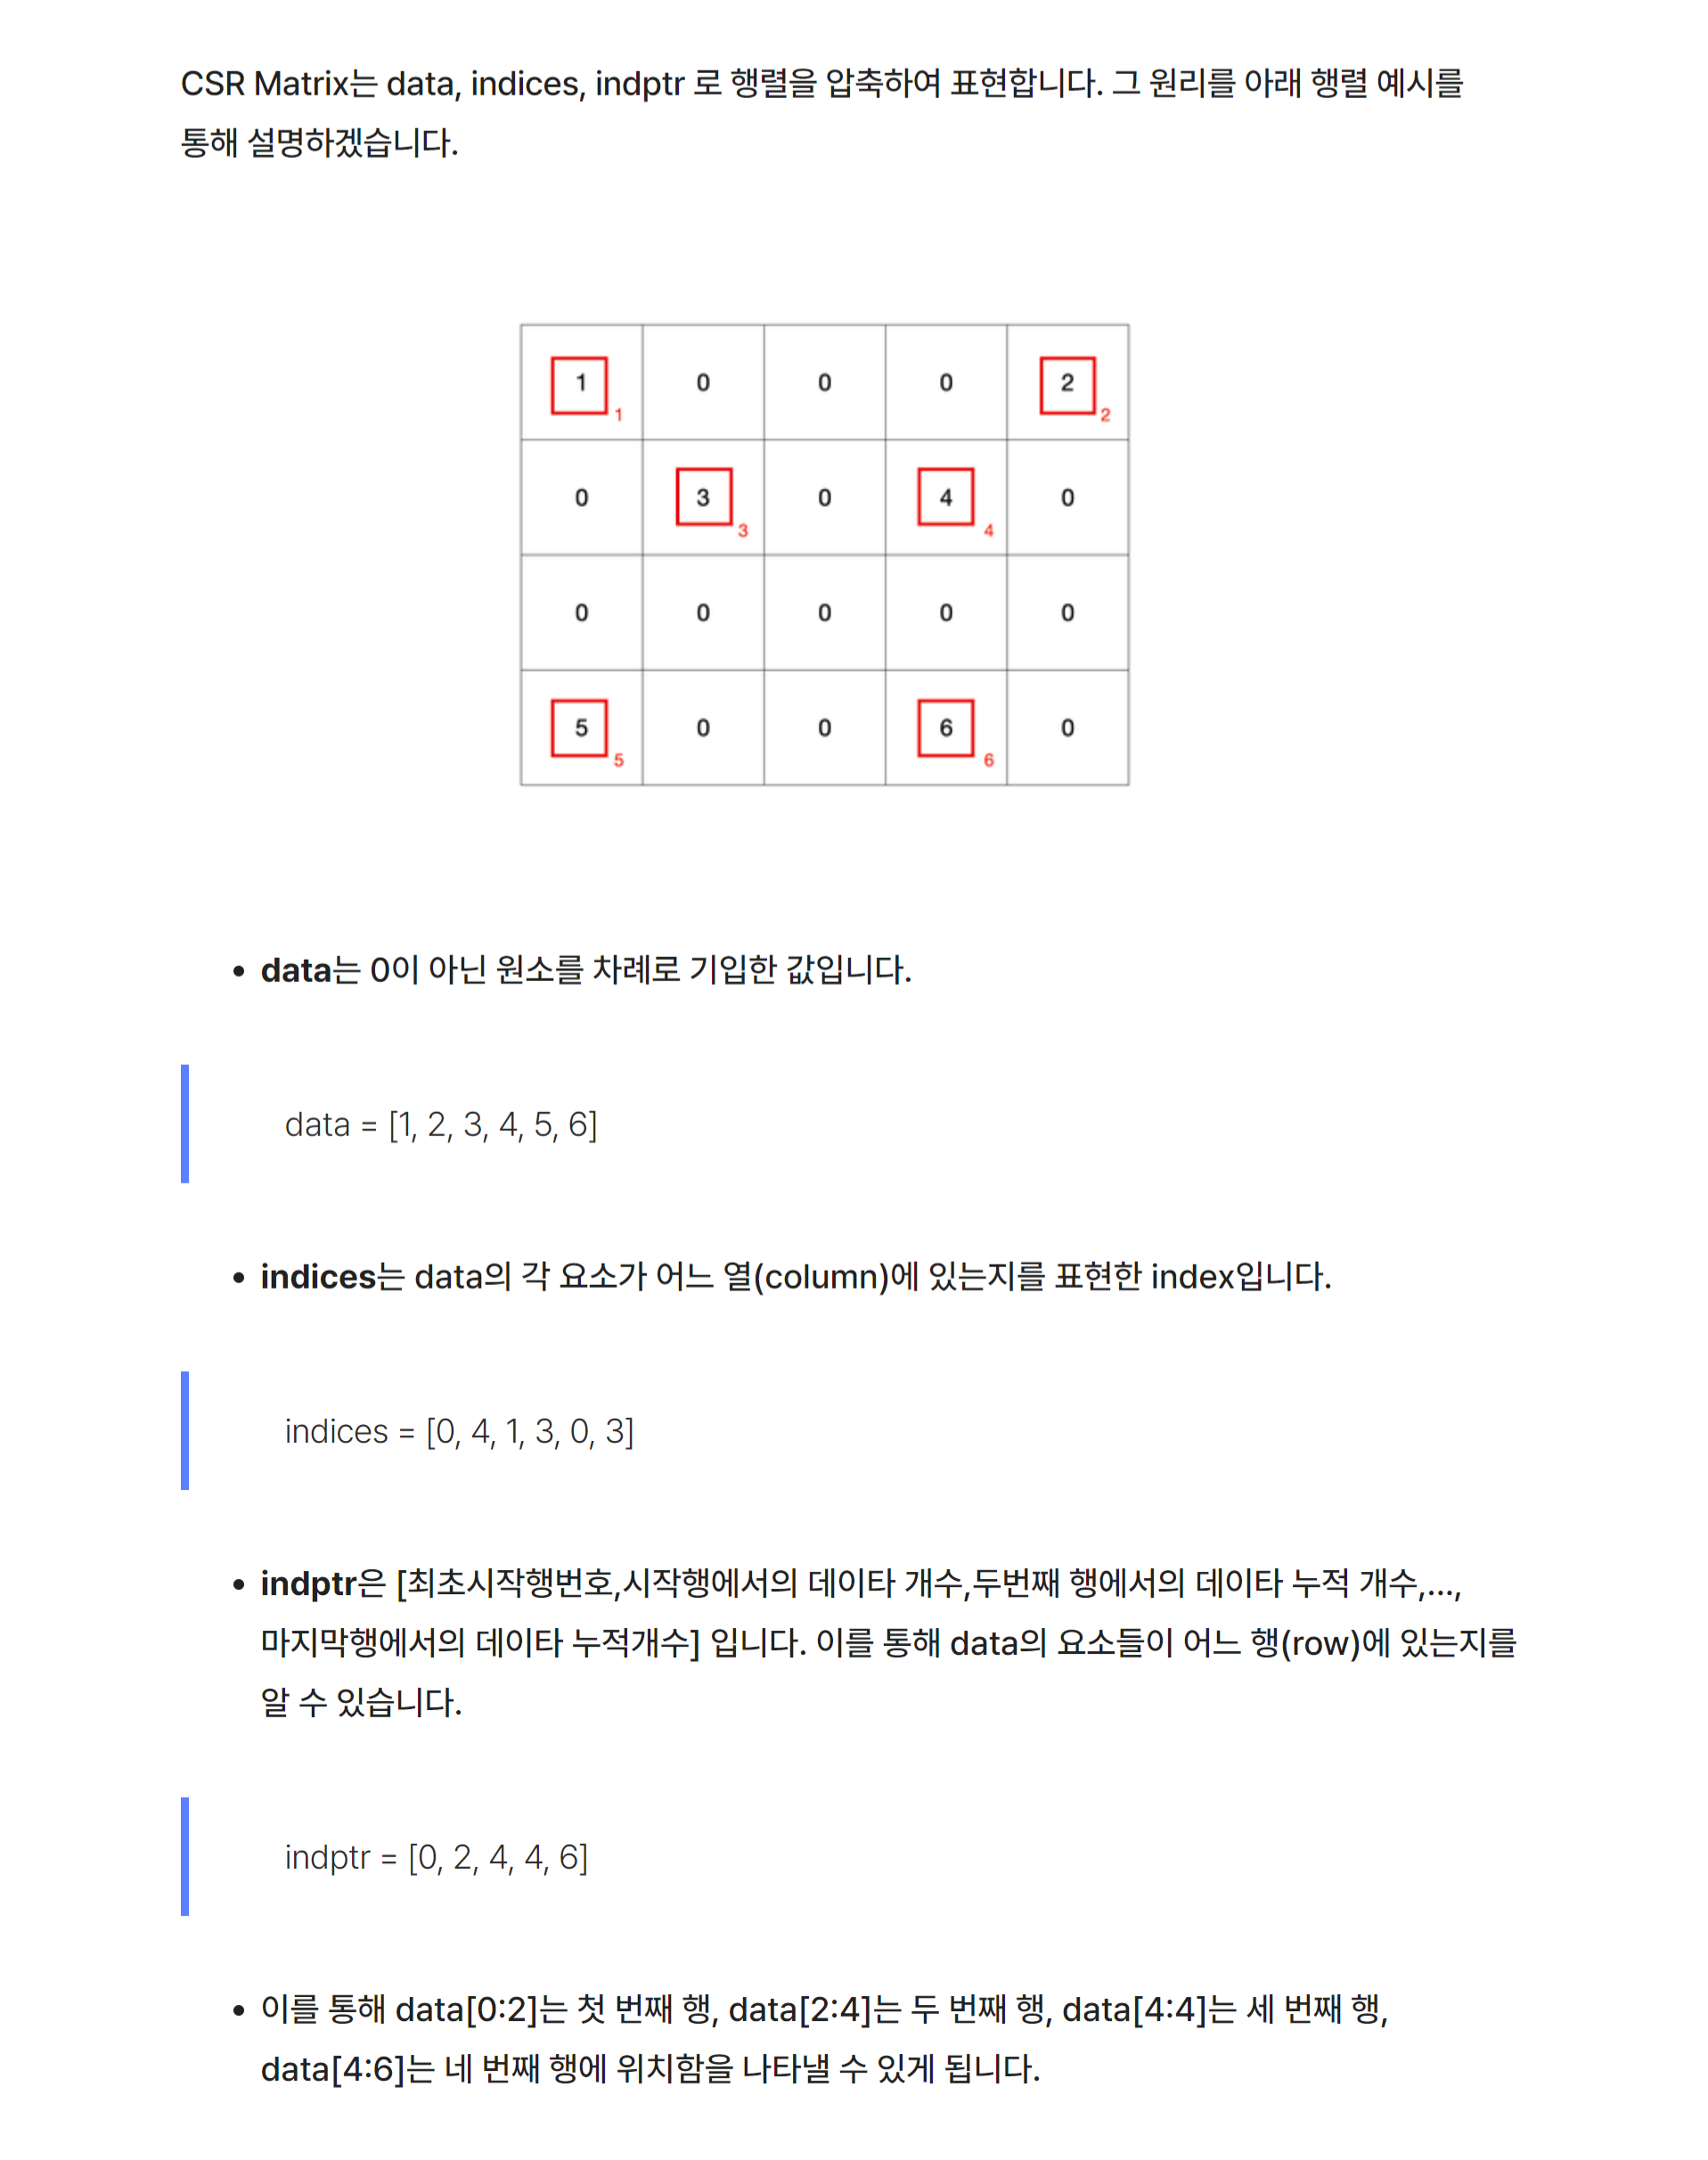

- CSR Matrix 표현의 경우, 외부 참고자료보다, 노드 학습 부분에서(위의 내용)가 가장 간결하고 보기쉽게 정리가 되어있다.

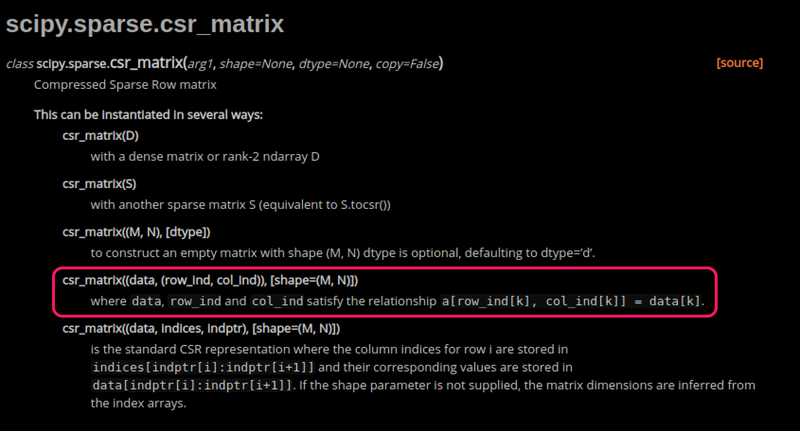

노드 학습 부분에 나와있는 그림과 설명이다. 변수들을 따라가면서 생각하면 이해가 된다.

일반적으로, 외부의 다른 참고자료보다 노드 내에서 이러한 자료들을 참고하는것은 상당히 편리하고 도움이 된다.

&nbsp;

CSR Matrix 또한 Matrix Factorization 에 기반하고 있다.

구성하는 방법은 scipy API Library 에서 편리한 함수를 제공하고 있어서 사용법은 간단한 편이지만,

MF 와 CSR 의 컨셉에 대해서는 위의 내용들에 요약 정리가 잘 되어있으니 여기서 이해를해 두는게 좋을 것이라 생각한다.

나중에 실제로는 이를 좀 더 향상시킨 방법들을 적용하게 될 것으로 보인다.

본문에 나온 정도만 이해해두면, 차후에 추천 시스템을 사용할 일이 있을 때에, 분명 도움이 될 것 같다는 생각이다.

아래에서 CSR Matrix 를 구성하겠다.

In [61]:
from scipy.sparse import csr_matrix

num_user = ratings['user_id'].nunique()
num_movie = ratings['movie_id'].nunique()

csr_data = csr_matrix((ratings.counts, (ratings.user_id, ratings.movie_id)), shape=(num_user, num_movie))
csr_data

<6040x3628 sparse matrix of type '<class 'numpy.int64'>'
	with 836488 stored elements in Compressed Sparse Row format>

### 5) als_model = AlternatingLeastSquares 모델을 직접 구성하여 훈련시켜 봅시다.

<hr>

▶ AlternatingLeastSquares

- 여기서는 0.4.8 버전을 사용한다. 
   
   + (Implicit) [AlternatingLeastSquares - Implicit 0.4.8 Documentation](https://implicit.readthedocs.io/en/latest/als.html)

   + (Implicit) [AlternatingLeastSquares - Implicit 0.6.1 Documentation](https://benfred.github.io/implicit/api/models/gpu/als.html)
   
   + 최신은 0.6.1 버전으로 보인다. 0.6.1 버전에서는 cpu 모델과 gpu 모델로 각각 분리되어 있으며,<br>0.4.8 버전의 gpu 사용 여부에 관한 파라메터가 없는것을 확인할 수 있다.
   
   + 메서드에 대해서는 0.6.1 버전의 공식 문서를 참고하는것이 도움이 된다.<br>다만, 여기서는 버전의 차이 문제가 있으니 따로 정리는 하지 않았다.
   


- Recommendation 모델은 '암묵적 피드백 협력 필터링을 위한 공역 그레이디언트 방법의 응용'에서 설명한 성능 최적화와 함께<br> 
 '[Collaborative Filtering for Implicit Feedback Datasets](http://yifanhu.net/PUB/cf.pdf)'에 설명된 알고리즘을 기반으로 한다.
 
  
- Parameters：
 
  + factors : 유저와 아이템의 벡터를 몇 차원으로 할 것인지
 
  + regularization : 과적합을 방지하기 위해 정규화 값을 얼마나 사용할 것인지
 
  + use_gpu : GPU를 사용할 것인지

  + iterations : epochs와 같은 의미. 데이터를 몇 번 반복해서 학습 할 지
 

In [62]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분입니다. 학습 내용과는 무관합니다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

여기서는 모델의 파라메터를 baseline 에서 변경하지 않고 일단 적용하도록 하겠다.

gpu 를 사용하지 않아도 크게 느리지 않다.

추론 결과가 좋지 않을 경우에 파라메터 변경을 수행해보도록 하겠다.

In [63]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, use_gpu=False, iterations=15, dtype=np.float32)

In [64]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose해줍니다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<3628x6040 sparse matrix of type '<class 'numpy.int64'>'
	with 836488 stored elements in Compressed Sparse Column format>

In [65]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

모델 학습이 끝났다! 이제 2가지를 살펴보도록 하자.

1. 6401 벡터와 1200【aliens (1986)】의 벡터를 어떻게 만들고 있는지,

2. 두 벡터를 곱하면 어떤 값이 나오는지

In [82]:
myid, mymovie = user_to_idx[6041], movie_to_idx[1200]
myid_vector, mymovie_vector = als_model.user_factors[myid], als_model.item_factors[mymovie]

print('슝=3')

슝=3


In [83]:
myid_vector

array([-1.0107784 , -0.81725824,  0.32806572,  0.9496898 , -1.4133723 ,
        0.23550259, -0.40735924,  0.10831091,  0.44122693,  0.32700855,
       -0.26168862, -0.19500348,  0.07578896,  1.3779566 , -2.1010475 ,
        0.06147603,  0.67065376,  0.16195951, -1.050153  , -0.25578263,
        1.5944015 ,  0.7172865 , -0.4701069 , -0.71959144, -0.06469882,
       -0.01329459,  0.64126635, -0.07129986, -0.17519131,  0.36153588,
       -0.09826467,  0.48998067, -0.4420316 ,  0.68824464,  0.41113022,
        1.3111798 ,  0.66096455, -0.24867752,  1.4876786 ,  0.06188561,
        0.00601703, -0.6017155 ,  0.492086  , -0.24475197, -0.19480279,
       -0.9413562 ,  1.3587189 ,  0.5796709 , -0.35012776,  1.1459587 ,
        0.51559204, -0.25965527,  0.08725732,  0.1505548 ,  0.7607126 ,
       -1.529376  , -0.5058422 ,  0.5570209 , -0.91162914, -0.23433441,
       -0.06000247,  1.5467924 ,  0.7703596 ,  0.2998229 , -0.7690705 ,
        0.30025733, -0.23188666,  1.338104  ,  0.07509591, -0.10

In [84]:
mymovie_vector

array([-0.02482192, -0.007012  , -0.00511879,  0.00320742, -0.01521653,
        0.01909682, -0.02053734,  0.01183793, -0.01688238,  0.02713523,
        0.01626684, -0.00845105, -0.00179589,  0.02407476, -0.01353998,
        0.00613551,  0.02566312,  0.01822863, -0.00105562,  0.01282943,
       -0.00497974, -0.00685559,  0.00542911, -0.02250202,  0.01358213,
        0.00662298,  0.04214094,  0.01225098,  0.00537782,  0.02196565,
        0.02244364,  0.01193987, -0.01627404,  0.02359259,  0.01917805,
        0.04019015,  0.01483938, -0.00936571,  0.02234313,  0.00240793,
        0.03020201,  0.00568961,  0.00079684, -0.00434467, -0.00737942,
        0.003374  ,  0.0490301 ,  0.01981699, -0.00793786,  0.01911636,
        0.01770424,  0.00492064,  0.00125813,  0.00877999,  0.01914198,
       -0.00679794, -0.0142354 ,  0.00380887, -0.01084639, -0.00192536,
       -0.00240751,  0.02608682,  0.01561785,  0.01675166, -0.00435113,
        0.00122293, -0.02195137,  0.02212152,  0.00792581, -0.00

In [85]:
# myid_vector과 mymovie_vector를 내적하는 코드
np.dot(myid_vector, mymovie_vector)

0.8682042

▲ 0.86 이라는 수치가 나왔다.

모델이 저의 【1320 alien³(1992)】에 대한 선호도를 어떻게 예측할지 한 번 확인해 보자.

In [87]:
my_movie2 = movie_to_idx[1320]
movie2_vector = als_model.item_factors[my_movie2]
np.dot(myid_vector, movie2_vector)

0.56071264

▲ 0.56 이라는 수치가 나왔다.

&nbsp;

### 6) 훈련된 모델이 예측한 나의 선호도를 파악해 보자.

<hr>

선호도를 출력하는 함수를 하나 정의하도록 하겠다.

아까 내가 좋아하는 영화를 추가할 때 사용했던 my_favor_mov 를 입력으로 사용할 것이다.

In [108]:
print(type(my_favor_mov))
print(my_favor_mov)

<class 'list'>
[1200, 1214, 1320, 1690, 589, 1240, 1036, 1370, 47, 593]


print_favor 함수는, user_id 와 movie_id(리스트 형식)을 받아서 각 영화의 선호도 예측 결과를 출력한다.

In [133]:
def print_favor(user_id, movie_ids):
    uid = user_to_idx[user_id]
    uid_vector = als_model.user_factors[uid]
    print("user_id :", user_id)
    print("━" * 64)
    
    for movie_id in movie_ids:
        movid = movie_to_idx[movie_id]
        movie_vector = als_model.item_factors[movid]
        
        ## 내적(벡터간의 곱)
        dot_val = np.dot(uid_vector, movie_vector)
        
        ## 출력
        print("movie_id :", movid, "   \t", "선호도 예측：", round(dot_val, 2), "\t", "  Title :", get_movie_title(movie_id))
    

내가 선택했던 영화들을 기준으로 선호도 예측 결과를 확인 해 보자.

In [134]:
print_favor(6041, my_favor_mov)

user_id : 6041
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
movie_id : 651    	 선호도 예측： 0.87 	   Title : aliens (1986)
movie_id : 193    	 선호도 예측： 0.83 	   Title : alien (1979)
movie_id : 496    	 선호도 예측： 0.56 	   Title : alien³ (1992)
movie_id : 93    	 선호도 예측： 0.46 	   Title : alien: resurrection (1997)
movie_id : 92    	 선호도 예측： 0.72 	   Title : terminator 2: judgment day (1991)
movie_id : 200    	 선호도 예측： 0.87 	   Title : terminator, the (1984)
movie_id : 194    	 선호도 예측： 0.73 	   Title : die hard (1988)
movie_id : 111    	 선호도 예측： 0.37 	   Title : die hard 2 (1990)
movie_id : 220    	 선호도 예측： 0.48 	   Title : seven (se7en) (1995)
movie_id : 121    	 선호도 예측： 0.67 	   Title : silence of the lambs, the (1991)


다이하드2 좋아하는데, 모델의 선호도 예측값이 생각보다 낮고, 나머지들은 제법 높은 편이다.

자 그러면, 이제 나중에 확인하려고 일부러 준비해 놓은 나머지 영화들의 예측값을 확인해 보려고 한다.

영화는, 「프레데터, 블레이드러너, 공각기동대, 쇼생크탈출, 미저리, 포레스트 검프, 뱀파이어와의 인터뷰」 를 준비해봤다.

다 좋아하는 옛날 영화이다. 다른 것들도 많지만 그래도 어느정도 장르를 비슷하게 가져가 봤다.

애초에 에일리언 시리즈를 좋아하는 영화로 넣을 때, 프레데터 시리즈를 예측 평가할 때 사용 할 생각이었는데,

몇 개 더 넣어보려고 하는 와중에 생각나는 것들 정리 해 보았다.

In [257]:
find_movie_id("predator")
find_movie_id("blade runner")
find_movie_id("ghost in the shell")
find_movie_id("shawshank redemption")
find_movie_id("misery")
find_movie_id("gump")
find_movie_id("interview")

      movie_id              title                   genre
3458      3527    predator (1987)  Action|Sci-Fi|Thriller
3628      3697  predator 2 (1990)  Action|Sci-Fi|Thriller
     movie_id                title             genre
537       541  blade runner (1982)  Film-Noir|Sci-Fi
     movie_id                                       title             genre
731       741  ghost in the shell (kokaku kidotai) (1995)  Animation|Sci-Fi
     movie_id                             title  genre
315       318  shawshank redemption, the (1994)  Drama
      movie_id          title   genre
3430      3499  misery (1990)  Horror
     movie_id                title               genre
352       356  forrest gump (1994)  Comedy|Romance|War
     movie_id                              title         genre
250       253  interview with the vampire (1994)  Drama|Horror


이 영화들의 id 값을 정리해서 my_favor_mov2 를 만들자.

In [260]:
my_favor_mov2 = [3527, 3697, 541, 741, 318, 3499, 356, 253]

이제 이 영화들의 선호도 예측값을 확인해보자.

In [261]:
print_favor(6041, my_favor_mov2)

user_id : 6041
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
movie_id : 865    	 선호도 예측： 0.51 	   Title : predator (1987)
movie_id : 1503    	 선호도 예측： 0.25 	   Title : predator 2 (1990)
movie_id : 680    	 선호도 예측： 0.24 	   Title : blade runner (1982)
movie_id : 414    	 선호도 예측： 0.09 	   Title : ghost in the shell (kokaku kidotai) (1995)
movie_id : 157    	 선호도 예측： 0.29 	   Title : shawshank redemption, the (1994)
movie_id : 316    	 선호도 예측： 0.09 	   Title : misery (1990)
movie_id : 160    	 선호도 예측： 0.07 	   Title : forrest gump (1994)
movie_id : 427    	 선호도 예측： 0.01 	   Title : interview with the vampire (1994)


▲ 선호도 예측 결과에 대한 생각

- 에일리언 좋아하는것을 알려줘서 그런지, 프레데터 시리즈는 일단 제법 높게 나왔다.

- 블레이드 러너의 경우도 상당히 좋아하는 작품인데, 25 정도면 괜찮게 나온 것 같다.

- 공각기동대는 애니메이션인데, 정말 좋아하는 장르의 애니메이션이다. 선호도는 그렇게 높게 나온 것 같지 않다.

- 쇼생크 탈출은 설명이 필요없는 명작이다. 생각보다 높진 않지만, 이정도면 괜찮은 것 같다.

- 미저리도 상당히 좋아하는 작품이다. 양들의 침묵, 한니발 너무 좋아하는데, 이것은 생각보다 낮은 것 같다.

- 포레스트 검프도 전설의 명작인데, 생각보다 많이 낮은것 같다.

- 뱀파이어와의 인터뷰 개인적으로 뱀파이어 물도 좋아하고 할로윈 시기라 생각이 났는데, 생각보다 너무 낮게 나왔다.


제일 아쉬운건, 미저리가 많이 낮게 나온 것 같다.

나머지야 장르적인 측면에서 몇 안되는 샘플치고 많이 벗어나서 그럴 수 있겠다고 생각한다.

기본적으로 쇼생크 탈출이나, 포레스트 검프의 경우는, 워낙 성공한 작품이라,

이미 들어있던 다른 사람들의 데이터에서도 어느정도 비슷비슷한 성향으로 많이 본 작품이라

어느정도의 선호도가 기본적으로 채워져 있다가 결과가 나온 느낌이다.

__이 영화는 워낙 훌륭하니, 어지간해선 당신이(내가) 선호 할 것입니다__ 라고 예측했을 것 같다는 느낌이다.



&nbsp;

### 7) 비슷한 영화를 추천받기 + 유저에게 영화 추천하기 (통합 평가)

<hr>

`AlternatingLeastSquares` 클래스에 구현되어 있는 `similar_items` 메서드를 통하여 비슷한 영화를 찾는다.

내가 제일 좋아하는 `alien (1979)` 으로 찾아보도록 하겠다.

In [262]:
find_movie_id("alien")

      movie_id                       title                          genre
1182      1200               aliens (1986)     Action|Sci-Fi|Thriller|War
1196      1214                alien (1979)  Action|Horror|Sci-Fi|Thriller
1300      1320               alien³ (1992)  Action|Horror|Sci-Fi|Thriller
1644      1690  alien: resurrection (1997)           Action|Horror|Sci-Fi
1645      1692         alien escape (1995)                  Horror|Sci-Fi
3632      3701         alien nation (1988)             Crime|Drama|Sci-Fi


In [263]:
favorite_movie = 1214
favor_movie_id = movie_to_idx[favorite_movie]
similar_movie = als_model.similar_items(favor_movie_id, N=15)
similar_movie

[(193, 0.9999999),
 (651, 0.80500335),
 (200, 0.7057574),
 (197, 0.5935708),
 (602, 0.499082),
 (680, 0.49105904),
 (44, 0.48797396),
 (865, 0.4658216),
 (899, 0.45147288),
 (93, 0.43422413),
 (496, 0.430816),
 (124, 0.41838455),
 (91, 0.41028115),
 (194, 0.409388),
 (3509, 0.40498278)]

쩝, 약간 보기에 불편하다. 매번 변환을 하려니ㅡ

아무튼, 비슷한 영화를 이름으로 찾아서 출력하는 함수를 만들도록 하겠다.

In [264]:
#artist_to_idx 를 뒤집어, index로부터 movie_id 를 얻는 dict를 생성
idx_to_movie = {v:k for k,v in movie_to_idx.items()}
[idx_to_movie[i[0]] for i in similar_movie]

[1214,
 1200,
 1240,
 1387,
 924,
 541,
 260,
 3527,
 2288,
 1690,
 1320,
 2571,
 3471,
 1036,
 1830]

In [268]:
idx_to_movie[193]

1214

ppp_list_mov 함수를 정의하도록 하겠다. 대충 이런 모양의 내용을 입력 받으면,

영화 이름을 가져와서 출력 내용을 적당히 꾸미고, 출력을 해 주는 기능으로 구현하였다.

값에 대한 설명을 퍼센트 단위로 잡아 놓았는데, 적당한지는 모르겠지만

대충 어떤 느낌인지는 전해지기에 충분하리라 생각해서, 일단 사용하도록 하겠다.

In [287]:
def ppp_list_mov(movie_lists, kor_desc="값"):
    for mov_idx, mov_value in movie_lists:
        print(kor_desc, ":", round(mov_value * 100, 3), "％", "  \t", get_movie_title(idx_to_movie[mov_idx]))       

In [286]:
ppp_list_mov(similar_movie, "유사도")

유사도 : 100.0 ％   	 alien (1979)
유사도 : 80.5 ％   	 aliens (1986)
유사도 : 70.576 ％   	 terminator, the (1984)
유사도 : 59.357 ％   	 jaws (1975)
유사도 : 49.908 ％   	 2001: a space odyssey (1968)
유사도 : 49.106 ％   	 blade runner (1982)
유사도 : 48.797 ％   	 star wars: episode iv - a new hope (1977)
유사도 : 46.582 ％   	 predator (1987)
유사도 : 45.147 ％   	 thing, the (1982)
유사도 : 43.422 ％   	 alien: resurrection (1997)
유사도 : 43.082 ％   	 alien³ (1992)
유사도 : 41.838 ％   	 matrix, the (1999)
유사도 : 41.028 ％   	 close encounters of the third kind (1977)
유사도 : 40.939 ％   	 die hard (1988)
유사도 : 40.498 ％   	 follow the bitch (1998)


몇개 더 찾아보기 위해, 함수로 만들고 확인 해 보자.

In [290]:
def get_similar_movie(movie_id: int):
    movie_id = movie_to_idx[movie_id]
    similar_movies = als_model.similar_items(movie_id)
#     similar_movies = [idx_to_movie[i[0]]] for i in similar_movies]
    ppp_list_mov(similar_movies, "유사도")

우선 프레데터 먼저 찾아보자. 에일리언이 나올 것 같다.

In [291]:
find_movie_id("predator")

      movie_id              title                   genre
3458      3527    predator (1987)  Action|Sci-Fi|Thriller
3628      3697  predator 2 (1990)  Action|Sci-Fi|Thriller


In [292]:
get_similar_movie(3527)

유사도 : 100.0 ％   	 predator (1987)
유사도 : 74.837 ％   	 robocop (1987)
유사도 : 65.684 ％   	 terminator, the (1984)
유사도 : 65.381 ％   	 aliens (1986)
유사도 : 54.667 ％   	 escape from new york (1981)
유사도 : 48.125 ％   	 die hard (1988)
유사도 : 47.802 ％   	 running man, the (1987)
유사도 : 47.539 ％   	 abyss, the (1989)
유사도 : 46.582 ％   	 alien (1979)
유사도 : 46.496 ％   	 star trek: the wrath of khan (1982)


에일리언이 나온것을 확인할 수 있다.

In [293]:
find_movie_id("lamb")

     movie_id                             title           genre
589       593  silence of the lambs, the (1991)  Drama|Thriller


In [294]:
get_similar_movie(593)

유사도 : 100.0 ％   	 silence of the lambs, the (1991)
유사도 : 81.803 ％   	 shawshank redemption, the (1994)
유사도 : 75.858 ％   	 fargo (1996)
유사도 : 70.465 ％   	 pulp fiction (1994)
유사도 : 58.813 ％   	 schindler's list (1993)
유사도 : 55.528 ％   	 goodfellas (1990)
유사도 : 52.894 ％   	 good will hunting (1997)
유사도 : 52.162 ％   	 usual suspects, the (1995)
유사도 : 51.264 ％   	 sling blade (1996)
유사도 : 48.492 ％   	 sixth sense, the (1999)


양들의 침묵이, 쇼생크 탈출하고 그렇게 많이 비슷한가…？

이 영화는 장르물 보다는 흥행 대성공 한, 대작 위주로 많이 나온 것 같아보인다.

특징이 「명작」같은 것으로 잡힌게 아닐까 싶다.

유주얼 서스펙츠도 꽤 명작인데, 이걸 잊고 있었다. 조만간 시간나면 다시 보고 싶다.

&nbsp;

▲ 지금까지의 내용 - 유사도 예측 결과에 대한 생각

유사도의 경우 예측 결과가 상당히 만족스럽다. 

프레데터의 경우, 적과 힘겹게 싸워서 생존하는 등의

SF 를 약간 섞은, 아주 강력한 액션을 가지고 있는 영화들이 유사 관계를 맺고 있음을 확인 할 수 있었고.

양들의 침묵의 경우, 엄밀히 말해서 장르가 완전히 같은것이냐면 그렇지는 않지만, 

영화의 구성에 있어서 인상적인 측면이나 이야기가 진행되는 느낌들이 비슷한 경우라고도 볼 수 있다.

이건 뭔가 인물들간의 심리나 스토리. 드라마적인 측면이 강력한 영화들로 꾸며진 느낌이다.

유사도에 집계된 영화들도 대부분, 다 본 영화들이라 알 수 있다.

설명하자면 길지만 대강의 느낌을 봤을때, 유사도 예측이 상당히 잘 되었다고 생각한다.

<hr>

__이번에는 영화 추천하기를 해 보자.__

`AlternatingLeastSquares` 클래스에 구현되어 있는 `recommend` 메서드를 통하여

내가 좋아할 만한 영화를 추천받도록 하겠다.

`filter_already_liked_items` 는 유저가 이미 평가한 아이템은 제외하는 Argument 이다.

In [284]:
user = user_to_idx[6041]

# recommend에서 user*item CSR Matrix를 받는다.
movie_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
movie_recommended

[(865, 0.50662667),
 (124, 0.4843222),
 (233, 0.4828416),
 (62, 0.44981605),
 (289, 0.42941478),
 (141, 0.42172024),
 (222, 0.3645861),
 (51, 0.36424583),
 (75, 0.34467593),
 (38, 0.33358872),
 (197, 0.2976265),
 (637, 0.29757762),
 (137, 0.28700167),
 (157, 0.28568774),
 (882, 0.2813014),
 (224, 0.26219085),
 (899, 0.25891182),
 (373, 0.2554531),
 (602, 0.25411326),
 (1503, 0.25138223)]

추천도라는 단어가 적당한지 모르겠지만,

이렇게 생긴 데이터를 적절히 출력해주는 함수를 아까 정의했다.

추천도라는 문구를 일단 적용 해 보자, 이게 맞는지는 모르겠지만 대강 느낌은 통할것이다.

In [295]:
ppp_list_mov(movie_recommended, "추천도")

추천도 : 50.663 ％   	 predator (1987)
추천도 : 48.432 ％   	 matrix, the (1999)
추천도 : 48.284 ％   	 usual suspects, the (1995)
추천도 : 44.982 ％   	 total recall (1990)
추천도 : 42.941 ％   	 reservoir dogs (1992)
추천도 : 42.172 ％   	 fugitive, the (1993)
추천도 : 36.459 ％   	 pulp fiction (1994)
추천도 : 36.425 ％   	 fargo (1996)
추천도 : 34.468 ％   	 hunt for red october, the (1990)
추천도 : 33.359 ％   	 sixth sense, the (1999)
추천도 : 29.763 ％   	 jaws (1975)
추천도 : 29.758 ％   	 abyss, the (1989)
추천도 : 28.7 ％   	 die hard: with a vengeance (1995)
추천도 : 28.569 ％   	 shawshank redemption, the (1994)
추천도 : 28.13 ％   	 mad max 2 (a.k.a. the road warrior) (1981)
추천도 : 26.219 ％   	 l.a. confidential (1997)
추천도 : 25.891 ％   	 thing, the (1982)
추천도 : 25.545 ％   	 heat (1995)
추천도 : 25.411 ％   	 2001: a space odyssey (1968)
추천도 : 25.138 ％   	 predator 2 (1990)


함수로 다시 정리 해 봤다. 아, 그러고보니 한번 뿐이 사용하지 않겠네.

In [296]:
def get_rcomnd_movie(user_id: int):
    user_id = user_to_idx[user_id]
    movie_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
    ppp_list_mov(movie_recommended, "추천도")

In [319]:
get_rcomnd_movie(6041)

추천도 : 50.663 ％   	 predator (1987)
추천도 : 48.432 ％   	 matrix, the (1999)
추천도 : 48.284 ％   	 usual suspects, the (1995)
추천도 : 44.982 ％   	 total recall (1990)
추천도 : 42.941 ％   	 reservoir dogs (1992)
추천도 : 42.172 ％   	 fugitive, the (1993)
추천도 : 36.459 ％   	 pulp fiction (1994)
추천도 : 36.425 ％   	 fargo (1996)
추천도 : 34.468 ％   	 hunt for red october, the (1990)
추천도 : 33.359 ％   	 sixth sense, the (1999)
추천도 : 29.763 ％   	 jaws (1975)
추천도 : 29.758 ％   	 abyss, the (1989)
추천도 : 28.7 ％   	 die hard: with a vengeance (1995)
추천도 : 28.569 ％   	 shawshank redemption, the (1994)
추천도 : 28.13 ％   	 mad max 2 (a.k.a. the road warrior) (1981)
추천도 : 26.219 ％   	 l.a. confidential (1997)
추천도 : 25.891 ％   	 thing, the (1982)
추천도 : 25.545 ％   	 heat (1995)
추천도 : 25.411 ％   	 2001: a space odyssey (1968)
추천도 : 25.138 ％   	 predator 2 (1990)


▲ 여기까지의 내용 - 추천도 예측 결과에 대한 생각

__훌륭한 추천이다.__

프레데터는 안봤다고 처리 했었는데, 역시 제일 먼저 프레데터를 추천해준다.

이정도면 기대이상으로 추천 성능이 잘 나온다고 생각한다.

유주얼 서스펙츠도 들어있고, 토탈리콜도 들어있고, 어비스까지… 상당히 추천은 괜찮게 나오고 있다.

식스센스, 2001 스페이스 오디세이도 있다. 놀랍다！

추천에 잡혀있는 영화들 대부분 내가 좋아하는 영화들이다.

가운데에 조스의 경우는 너무 옛날 영화라서 예외이고, 매드맥스는 안봤다

나머지들은 재밌게 본 영화들이라, 추천이 상당히 잘 된 것 같다.

매우 만족스러운 결과이다.

&nbsp;

`AlternatingLeastSquares` 클래스에 구현된 `explain` 메서드를 사용하면

유저가 기록을 남긴 데이터 중 왜 이 것을 추천해 줬는지, 추천에 기여한 정도를 확인할 수 있다.

In [301]:
find_movie_id("predator")

      movie_id              title                   genre
3458      3527    predator (1987)  Action|Sci-Fi|Thriller
3628      3697  predator 2 (1990)  Action|Sci-Fi|Thriller


In [302]:
predator = movie_to_idx[3527]    ## predator (1987)
explain = als_model.explain(user, csr_data, itemid=predator)

In [303]:
explain

(0.49774871983474,
 [(651, 0.1250084490381079),
  (200, 0.11910305157194793),
  (194, 0.0696117731933406),
  (193, 0.05772077722473828),
  (111, 0.029517235386301702),
  (220, 0.02757313620348613),
  (92, 0.02168907026869496),
  (121, 0.0174852165970993),
  (496, 0.016271437670276966),
  (93, 0.01376857268074624)],
 (array([[ 0.58807881,  0.09206803,  0.12073313, ...,  0.10774114,
           0.12786222,  0.1035896 ],
         [ 0.05414325,  0.60550084,  0.06870497, ...,  0.08688987,
           0.0865099 ,  0.11106546],
         [ 0.0710006 ,  0.05271658,  0.58827846, ...,  0.05492913,
           0.08566571,  0.10246148],
         ...,
         [ 0.06336028,  0.0625314 ,  0.05129132, ...,  0.5467672 ,
          -0.01537616,  0.00435275],
         [ 0.07519306,  0.06415384,  0.07177616, ...,  0.04248367,
           0.51069863,  0.01167057],
         [ 0.06091885,  0.07678752,  0.08041333, ...,  0.06672114,
           0.06954861,  0.5369096 ]]),
  False))

In [312]:
explain_list = [(idx_to_movie[i[0]], i[1]) for i in explain[1]]

In [314]:
explain_list

[(1200, 0.1250084490381079),
 (1240, 0.11910305157194793),
 (1036, 0.0696117731933406),
 (1214, 0.05772077722473828),
 (1370, 0.029517235386301702),
 (47, 0.02757313620348613),
 (589, 0.02168907026869496),
 (593, 0.0174852165970993),
 (1320, 0.016271437670276966),
 (1690, 0.01376857268074624)]

explain[1] 부분이 추천 기여도 항목이다. 이전에 정의한 함수를 통해 아래와 같이 사용 가능하다.

In [315]:
ppp_list_mov(explain[1], "추천 기여도")

추천 기여도 : 12.501 ％   	 aliens (1986)
추천 기여도 : 11.91 ％   	 terminator, the (1984)
추천 기여도 : 6.961 ％   	 die hard (1988)
추천 기여도 : 5.772 ％   	 alien (1979)
추천 기여도 : 2.952 ％   	 die hard 2 (1990)
추천 기여도 : 2.757 ％   	 seven (se7en) (1995)
추천 기여도 : 2.169 ％   	 terminator 2: judgment day (1991)
추천 기여도 : 1.749 ％   	 silence of the lambs, the (1991)
추천 기여도 : 1.627 ％   	 alien³ (1992)
추천 기여도 : 1.377 ％   	 alien: resurrection (1997)


pp_list_mov 는 preprocess 가 하나 빠졌다.

(영화 인덱스 찾아오는 부분이 빠지고, 실제 영화 인덱스가 바로 나오도록 되어있다.)

그래서 ppp_list_mov 와는 다르게 새로 정의하였다.

In [316]:
def pp_list_mov(movie_lists, kor_desc="값"):
    for mov_idx, mov_value in movie_lists:
        print(kor_desc, ":", round(mov_value * 100, 3), "％", "  \t", get_movie_title(mov_idx))

따라서 explain_list 를 통해서는, 아래와 같이 사용 가능하다.

In [318]:
pp_list_mov(explain_list, "추천 기여도")

추천 기여도 : 12.501 ％   	 aliens (1986)
추천 기여도 : 11.91 ％   	 terminator, the (1984)
추천 기여도 : 6.961 ％   	 die hard (1988)
추천 기여도 : 5.772 ％   	 alien (1979)
추천 기여도 : 2.952 ％   	 die hard 2 (1990)
추천 기여도 : 2.757 ％   	 seven (se7en) (1995)
추천 기여도 : 2.169 ％   	 terminator 2: judgment day (1991)
추천 기여도 : 1.749 ％   	 silence of the lambs, the (1991)
추천 기여도 : 1.627 ％   	 alien³ (1992)
추천 기여도 : 1.377 ％   	 alien: resurrection (1997)


추천 기여도의 구성 성분은 내가 처음에 무슨 무슨 영화 봤다고 데이터셋에 넣었던

그 영화들이 표시되는 것을 알 수 있다.

개인적으로는 에일리언 시리즈중에 하나가 그래도 제일 높은 기여도를 가져간 것은 인정.

터미네이터도 계속 추적당하면서 생존을 위해 힘겹게 도망치는것도 느낌적으로는 비슷하니까 인정.

약간 아쉬운점은, 상대적인 기여도가 제일 낮은, 바닥에서 두개 항목이 또 에일리언 시리즈라는 점이다.

굳이 걸고 넘어지자면, 다이하드 시리즈와 맨 아래의 에일리언 시리즈 2작품이 위치가 바뀌면 어떨까 싶은 생각이 들었다..

&nbsp;

▲ 여기까지의 내용 - 추천 기여도 예측 결과에 대한 생각

추천 기여도는, 내가 봤던 영화들을 토대로 영화를 추천함에 있어서

내가 본 영화들의 특징들이 얼마나 추천에 기여했는지를 수치화 해서 나타냈다고 볼 수 있다.

내 생각에 추천 기여도의 경우는 수치적으로는 논란의 여지가 있다고 보는데,

내가 봤던 영화들을 토대로 구성된 정보이다보니, 사실 좀 더 샘플이 많아야 할 것 같아서

기본적으로는 예측 결과는 긍정적으로 보고 있다.

지금 약간 아쉬운점은, 아무래도 여러 영화들에 대한 기록과 별점(횟수)들이 덜 쌓여서

추천 기여도의 경우는 지금 상황만 놓고보면 대단히 훌륭하진 않다는 생각이다.

그럼에도 불구하고 몇개 안되는 데이터로 이정도의 성과라는걸 따져보면,

역시 상당히 의미가 있는 결과라고 생각한다.

&nbsp;

<hr>

### ■ 프로젝트 회고

#### 1) 이번 프로젝트에서 '어려웠던 점'

프로젝트 완성에 이르기 까지, 전반적으로 노드 학습／실습 부분을 토대로 진행하면서 크게 어려움을 느끼진 않았다.

다만, 비교적 프로젝트 진행 계획 세우는, 처음 단계에서 이론 부분을 학습 하는데에 시간이 많이 소요된 것 같다.

어떤 기술들과 이론들을 바탕으로 추천 시스템이 꾸며졌는지, 각각의 추천 시스템과 모델들의 특징, 장단점 등

AWS와 멜론, 유튜브, 넷플릭스 등의 추천시스템에 대한 영상들을 보면서 준비를 했다.

AWS의 영상의 초중반부에서 용어나 개념들을 많이 배울 수 있었다. 해당 영상은 레퍼런스 부분에도 기록하였다.

MovieLens 데이터셋을 처음 열어보고 시간과 장르 항목 때문에 고민을 많이 했다,

컨텐츠 기반 필터링 과 협업 기반 필터링 방법을 다시 학습 하고 나서,

이 프로젝트에서는 컨텐츠 기반 필터링이 주요 목표가 아니기 때문에 시간과 장르는 고려하지 않고 진행할 수 있었다.

사실 컨텐츠 기반의 경우 협업 기반 필터링 방식과 비교하면 성능이 떨어지기 때문에 인기가 별로다.

데이터 전처리를 앞두고 매번 고민을 하고, 첫 발걸음을 떼는것이 여전히 어려운 것 같다.

#### 2) 프로젝트를 진행하면서 본인이 '학습한 내용'

우선 다른 것 보다, 추천 시스템에 대한 개념을 학습하는것에 시간을 많이 들였다.

그리고 그와 관련하여 Matrix Factorization 과 널리 쓰이는 CSR Matrix 에 대해서 학습했다.

외부에서도 여러 참고자료들을 확인 할 수는 있었는데, 노드 학습 부분에 나온 정리가 이미

간결하게 잘 되어 있어서 해당 내용을 바탕으로 가볍게 정리하는 방향으로 학습하였고, 그 기록을 남겨두었다.

사실상, 추천 모델을 만들기 위한 주변 과정들이 대부분 학습한 범위안에 포함되고 있다.

학습과정중에 MF 개념을 발전시킨 최신의 방법들도 찾아볼 수 있었는데,

라이브러리의 도움을 받았다지만, 이 프로젝트를 수행하며 필수적으로 MF 는 알고 넘어가야 할 것 같아서

MF 와 CSR Matrix 부분을 연계해서 공부했다.

developer.google.com 에서의 행렬분해 내용도 잘 되어있었는데, (심지어 예시는 영화를 기준으로 설명)

그 첫번째 그림이 이해하기 쉽게 잘 짜여있고ㅡ 노드 학습 부분에서도 참고자료로 사용하고 있었다.

노드 안에서 개념정리가 대부분 이루어진것 같아서, 솔직히, 마음이 편했다.

#### 3) 프로젝트를 진행하면서 '알아낸 점' 혹은 '아직 모호한 점'

추천 시스템에서, 컨텐츠／협업 기반 필터링의 장점 단점과 적용 사례들을 통한 학습을 하면서 추천의 매력에 빠져든 것 같다.

MF 모델을 만들고 학습하고, 그 결과를 als 클래스의 여러 메서드들을 통해, 이런 저런 결과에 대해 유추해 보는 과정도 상당히 흥미로운 과정이었다.

많은 생각들도 하면서 때때로 놀랍기도 했고, 예상 이상으로 프레데터가 떡 하니 올라왔을 때에, 뭔가 지쳐있다가도 다시 할 맛이 났다.

여러가지 생각들을 해 보면서, 어떤식으로 결과가 나왔는지 생각해보면, 결국 Matrix Factorization 을 통해

이렇게 추천 시스템이 이루어지는 구나 하는 결론에 도달하게 된다고 생각했다.

그래서 Matrix Factorization 부분에 대해서 더 알아보고자 하는 생각이 들었다.

모호한점은, 추천 시스템의 경우 객관적인 평가가 어렵기 때문에, 객관적인 지표를 정하기 어렵다고 했다.

그렇다면 앞으로 추천 모델의 성능 향상은 어떻게 해야 하는지, 아니면 어떤 방향성이나 기준같은게 있는지 궁금함이 생긴다.

나도 한번 생각 해 봤지만, 좀처럼 방법이 떠오르지 않았다.

#### 4) 루브릭 평가 지표를 맞추기 위해 '시도한 것들'

일반적으로 이번 프로젝트에서도 루브릭들은 베이스라인에 맞추어 진행하면 대부분 달성 가능한 편이라고 생각한다.

세번째 루브릭의 경우, 의미를 분석해 본다는 개념이 잘 와닿지 않아서,

해당 측정 값이 나오게 된 이유나 어떤 데이터들에서 영향을 받았을 지를 생각해보고, 그것들을 기록하는 방식으로 접근해서 분석해 보았다.

협업 기반 필터링 방식의 경우, 사실 컨텐츠는 고려하지 않고, 수 많은 유저들의 영화 선택 성향들에 영향을 받다보니

뭔가 수치적으로 측정하면서 분석을 수행한다는 방식이 상상이 되질 않았다. 그래도 최대한 정리를 해 보면서 여러 시도를 해 보았다.

그 외에는 대부분 루브릭 평가와 상세 기준 모두 진행 과정에서 달성 되었음을 확인 했다.

#### 5) 만약에 '루브릭 평가 지표를 달성하지 못했을 때, 이유에 관한 추정'

프로젝트를 진행하면서 조심스럽게 접근 했던 부분이 전처리 → CSR Matrix 부분과, 숫자 인코딩 부분이다.

이 부분에서 뭔가 틀어지면 큰일이겠다 싶었다.

기본적으로 여기서는 원형을 유지하는 방향으로 진행을 하고자 노력했다.

그래서 데이터셋 내부의 내용이 한눈에 들어오지는 않을 수 있다. (숫자로 이루어짐)

그런 이유로, 별도의 함수들을 만들어서 영화 제목 등을 변환하도록 구성을 했다.

조심스럽게 차근차근 진행해서, 진행도중에 트러블은 없었지만, 실수로 이 과정에서 잘못되면 위험하겠구나 생각이 들었다.

야생의 감 이랄까, 약간 그런게 생긴것 같다. 이건 정확하게 해야 안전하다. 이건 중요한 개념이니까 이해해야 한다. 라는 등의...

전처리, 숫자 인코딩, Matrix 부분에서 데이터 내용이나 형상관리에 실패하면,

또 대부분의 루브릭 달성에 어려움을 겪을 것 같다는 생각이 들었다.

아마 그 부분 주의하고, 베이스라인 정확하게 진행하면, 큰 문제는 없을 것 같다.

#### 6) 자기 다짐

추천 시스템의 경우 처음 생각과 달리 결과가 상당히 만족스러웠다.

번역기 프로젝트를 하면서도 결과에 깜짝 놀랐지만, 추천시스템이 그보다 더 좋아보인 점은,

사용자들의 데이터 집합이 어느정도 모양새를 갖추어 나가고 그 크기를 키워감에 따라,

추론 결과도 더 좋아지고, 다양한 파트의 데이터들을 추천시스템에 덧붙여가는 과정을 통해

비지니스를 성장시키고 규모를 키워가는 것에 큰 도움이 될 것이라는 생각이 들었기 때문이다.

실제 적용 사례가 많고, 그것들이 세상을 변화시키는 과정을 체감할 수 있는 이런 주제들은,

그 과정은 힘들지만 되돌아보면 매우 긍정적인 경험이었다는 생각이 난다.

이 프로젝트를 하면서 이런 저런 생각들도 많이 해 봤던 것도,

혹시 향후 다른 프로젝트들을 수행하게 될 때에, 밑거름 같은 역할을 하리라 생각한다.

나머지 노드들도 이런 마음가짐으로, 무사히 완성을 하면 좋겠다.

&nbsp;

<hr>

## ◎ Reference

- (AIFFEL) Exploration Project Node 13. 아이유팬이 좋아할 만한 다른 아티스트 찾기

- (추천시스템) [콘텐츠 추천 알고리즘의 진화](http://dl.moazine.com/viewer/index.asp?libraryid=9MtJb2T3nzH3yk7c212iu821DPFsY2ECOso0&a_i=8wwot4affaz3r6syx11VOYm2&keyword=&s_i=9#page/2)

- (추천시스템) [플레이리스트에 가장 어울리는 곡들을 예측할 수 있을까](https://arena.kakao.com/c/7)

- (추천시스템) [멜론에서 음악 추천을 어떻게 할까](https://brunch.co.kr/@kakao-it/342)

- (추천시스템) [추천 시스템의 원리와 구축 사례](https://youtu.be/MTAc8-ygAaM)

- (행렬 분해) [Fast and Scalable Matrix Factorization](https://arxiv.org/pdf/1610.05838.pdf)

- (행렬 분해) [협업 필터링과 행렬 분해 - 행렬 분해](https://developers.google.com/machine-learning/recommendation/collaborative/matrix)

- (행렬 분해) [Collaborative Filtering for Implicit Feedback Datasets](http://yifanhu.net/PUB/cf.pdf)

- (행렬 분해) [［추천 시스템］Matrix factorization](https://blog.naver.com/PostView.naver?blogId=shino1025&logNo=222394488801)

- (csr_matrix) [scipy.sparse.csr_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html)

- (Implicit)  [Implicit - Basic Usage](https://github.com/benfred/implicit#basic-usage)

- (Implicit) [AlternatingLeastSquares - Implicit 0.4.8 Documentation](https://implicit.readthedocs.io/en/latest/als.html)

- (Implicit) [AlternatingLeastSquares - Implicit 0.6.1 Documentation](https://benfred.github.io/implicit/api/models/gpu/als.html)



<hr>